## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# INTRODUCTION

## Business Statements

## Data Source

### Column Names and descriptions for Kings County Data Set
* **id** - Unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - Square footage of the land lots of the nearest 15 neighbors

## Methodology

# DATA SCRUBBING

1. Casting columns to the appropriate data types
2. Identifying and dealing with null and duplicated values appropriately
3. Removing columns that aren't required for modeling
4. Checking for normality with distplot, qqplot
5. Checking for linearity with boxplot, correlation coefficient
6. Removing outliers that are more than 3 standard deviation away from the mean
7. Checking for and dealing with multicollinearity with heatmap
8. Select potential features for modeling
9. Normalizing the continuous
10. One hot encoding categorical data

## Data Overview

In [6544]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [6545]:
#load dataset and view the first 5 rows
kc_house = pd.read_csv('./Data & Figures/kc_house_data.csv')
kc_house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6546]:
#get all column names
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6547]:
#review number of rows and columns
kc_house.shape

(21597, 21)

There are 21597 samples and 21 features for each.

In [6548]:
#look at all columns together with their datatype
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observation:**
* 'sqft_basement' datatye should be float
* 'date', 'yr_built', 'yr_renovated' should be in datetime object

## Deal with duplicates

In [6549]:
#check to see if 'id' is unique identifier for each sample
kc_house['id'].nunique()

21420

There are 21597 sample while 'id' has only 21420 counts, which means there are duplicates in the 'id' columns.

In [6550]:
#get sum of duplicates
kc_house['id'].duplicated().sum()

177

In [6551]:
#drop duplicates and only keep the most current data
kc_house = kc_house.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'first')

In [6552]:
#check again
kc_house['id'].duplicated().sum()

0

In [6553]:
#recheck dataframe shape
kc_house.shape

(21420, 21)

In [6554]:
#drop the entire 'id' since we already dealt with its duplicates and we don't need it anymore
kc_house.drop('id', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0   0.0          3      6         880         440.0   
20963     1.5         0.0   0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

## Deal with missing values

In [6555]:
#check for null values
kc_house.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2351
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3807
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**'waterfront'**

In [6556]:
#check out 'waterfront'
print(kc_house['waterfront'].nunique())

kc_house['waterfront'].value_counts()

2


0.0    18923
1.0      146
Name: waterfront, dtype: int64

In [6557]:
#calculate how big a percentage of the missing values in 'waterfront' from the whole dataset is
((kc_house['waterfront'].isnull().sum()) / (len(kc_house)) * 100).round(2)

10.98

In [6558]:
#assuming that missing values in 'waterfront' is the absence of waterfront, we'll replace it with value of 0 since the majority of data falls under this value
kc_house['waterfront'] = kc_house['waterfront'].fillna(0)

#check again
kc_house['waterfront'].isnull().sum()

0

**'view'**

In [6559]:
#calculate how big a percentage of the missing values in 'view' from the whole dataset is
((kc_house['view'].isnull().sum()) / (len(kc_house)) * 100).round(2)

0.29

In [6560]:
#'view' is number of times a house is viewed with the majority of the house has not been viewed 
#this is not a feature we are interested in and it provides no useful information 
#drop 'view'
kc_house.drop('view', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
20963     1.5         0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

**'yr_renovated'**

In [6561]:
#check out 'yr_renovated'
print(kc_house['yr_renovated'].nunique())

kc_house['yr_renovated'].value_counts()

70


0.0       16873
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1976.0        1
1951.0        1
1971.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [6562]:
#calculate how big a percentage of the missing values in 'yr_renovated' from the whole dataset is
((kc_house['yr_renovated'].isnull().sum()) / (len(kc_house)) * 100).round(2)

17.77

In [6563]:
#take a look at the missing data
kc_house[kc_house['yr_renovated'].isnull()].head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3        1.0         1320      8100   
7614    6/24/2014  339000.0         3        1.0         1100      4128   
4675    6/26/2014  670000.0         3        1.5         1490      4400   
1714    5/14/2014  800000.0         3        1.0         1700      4400   
10382    1/7/2015  575000.0         4        2.0         1810      4400   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
7614      1.0         0.0          4      7         720         380.0   
4675      1.5         0.0          4      7        1490           0.0   
1714      1.5         0.0          4      8        1700           0.0   
10382     2.0         0.0          3      8        1700         110.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
7614       1942           NaN    98126  47.5296 -122.379           1510   
4675       1906           NaN    98122  47.6113 -122.292           1560   
1714       1906           NaN    98122  47.6120 -122.292           1610   
10382      1909           NaN    98122  47.6132 -122.292           1470   

       sqft_lot15  
15937        8100  
7614         4538  
4675         4400  
1714         4180  
10382        4400

In [6564]:
#calculate percentage of 'yr_renovated' == 0.0
((len(kc_house[kc_house['yr_renovated'] == 0.0]) / len(kc_house)) * 100)

78.77217553688142

In [6565]:
#since the majority of 'yr_renovated' is 0.0, replace NaN with 0
kc_house['yr_renovated'] = kc_house['yr_renovated'].fillna(0)

#check again
kc_house['yr_renovated'].isnull().sum()

0

### Correct datatypes

**'sqft_basement'**

In [6566]:
#check out the 'sqft_basement' feature
kc_house['sqft_basement'].sort_values(ascending = True)

2495     0.0
5809     0.0
7739     0.0
19408    0.0
12796    0.0
        ... 
9442       ?
5765       ?
17113      ?
1476       ?
6325       ?
Name: sqft_basement, Length: 21420, dtype: object

We see that the '?' prevents us from correcting 'sqft_basement' to 'float64'. We need to fix this first.

In [6567]:
len(kc_house[kc_house['sqft_basement'] == '?'])

452

In [6568]:
#calculate 'sqft_basement' = 'sqft_living' - 'sqft_above'
for i in list(kc_house[kc_house['sqft_basement'] == '?'].index.values): 
    kc_house.loc[i, 'sqft_basement'] = kc_house.loc[i, 'sqft_living'] - kc_house.loc[i, 'sqft_above']

In [6569]:
#check again
kc_house[kc_house['sqft_basement'] == '?']

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [6570]:
#correct 'sqft_basement' to float
kc_house['sqft_basement'] = kc_house['sqft_basement'].astype('float64')

#check
kc_house['sqft_basement'].dtypes

dtype('float64')

**'date'**

In [6571]:
#check to see if 'date' is a datetime object
import datetime

isinstance(kc_house['date'][0], datetime.date)

False

In [6572]:
#convert 'date' to a datetime object
kc_house['date'] = pd.to_datetime(kc_house['date'])

#check again
isinstance(kc_house['date'][0], datetime.date)

True

# DATA EXPLORATION

Once we've the cleaned data, we do some further EDA to check out the distributions of the various columns, examine the descriptive statistics for the dataset, and to create some initial visualizations to better understand the dataset.

* Visualizing Distributions - Histplot with KDE
* Visualizing Normality - QQplot
* Visualizing Linearity - Boxplot of feature vs. 'price'
* Visualizing Linearity - LMplot to see regression line vs. data distribution 

In [6573]:
#get data summary statistics
kc_house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04   
mean   5.412725e+05      3.373950      2.118429   2083.132633  1.512804e+04   
std    3.677194e+05      0.925405      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.237250e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       1.495985      0.006816      3.410784      7.662792   1791.170215   
std        0.540081      0.082280      0.650035      1.171971    828.692965   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1200.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2220.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated      zipcode           lat  \
count   21420.000000  21420.000000  21420.000000  21420.00000  21420.000000   
mean      291.962418   1971.092997     68.956723  98077.87437     47.560197   
std       442.875502     29.387141    364.552298     53.47748      0.138589   
min         0.000000   1900.000000      0.000000  98001.00000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.00000     47.471200   
50%         0.000000   1975.000000      0.000000  98065.00000     47.572100   
75%       560.000000   1997.000000      0.000000  98117.00000     47.678100   
max      4820.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21420.000000   21420.000000   21420.000000  
mean    -122.213784    1988.384080   12775.718161  
std        0.140791     685.537057   27345.621867  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2370.000000   10086.250000  
max     -121.315000    6210.000000  871200.000000

## Initial Observation of Data

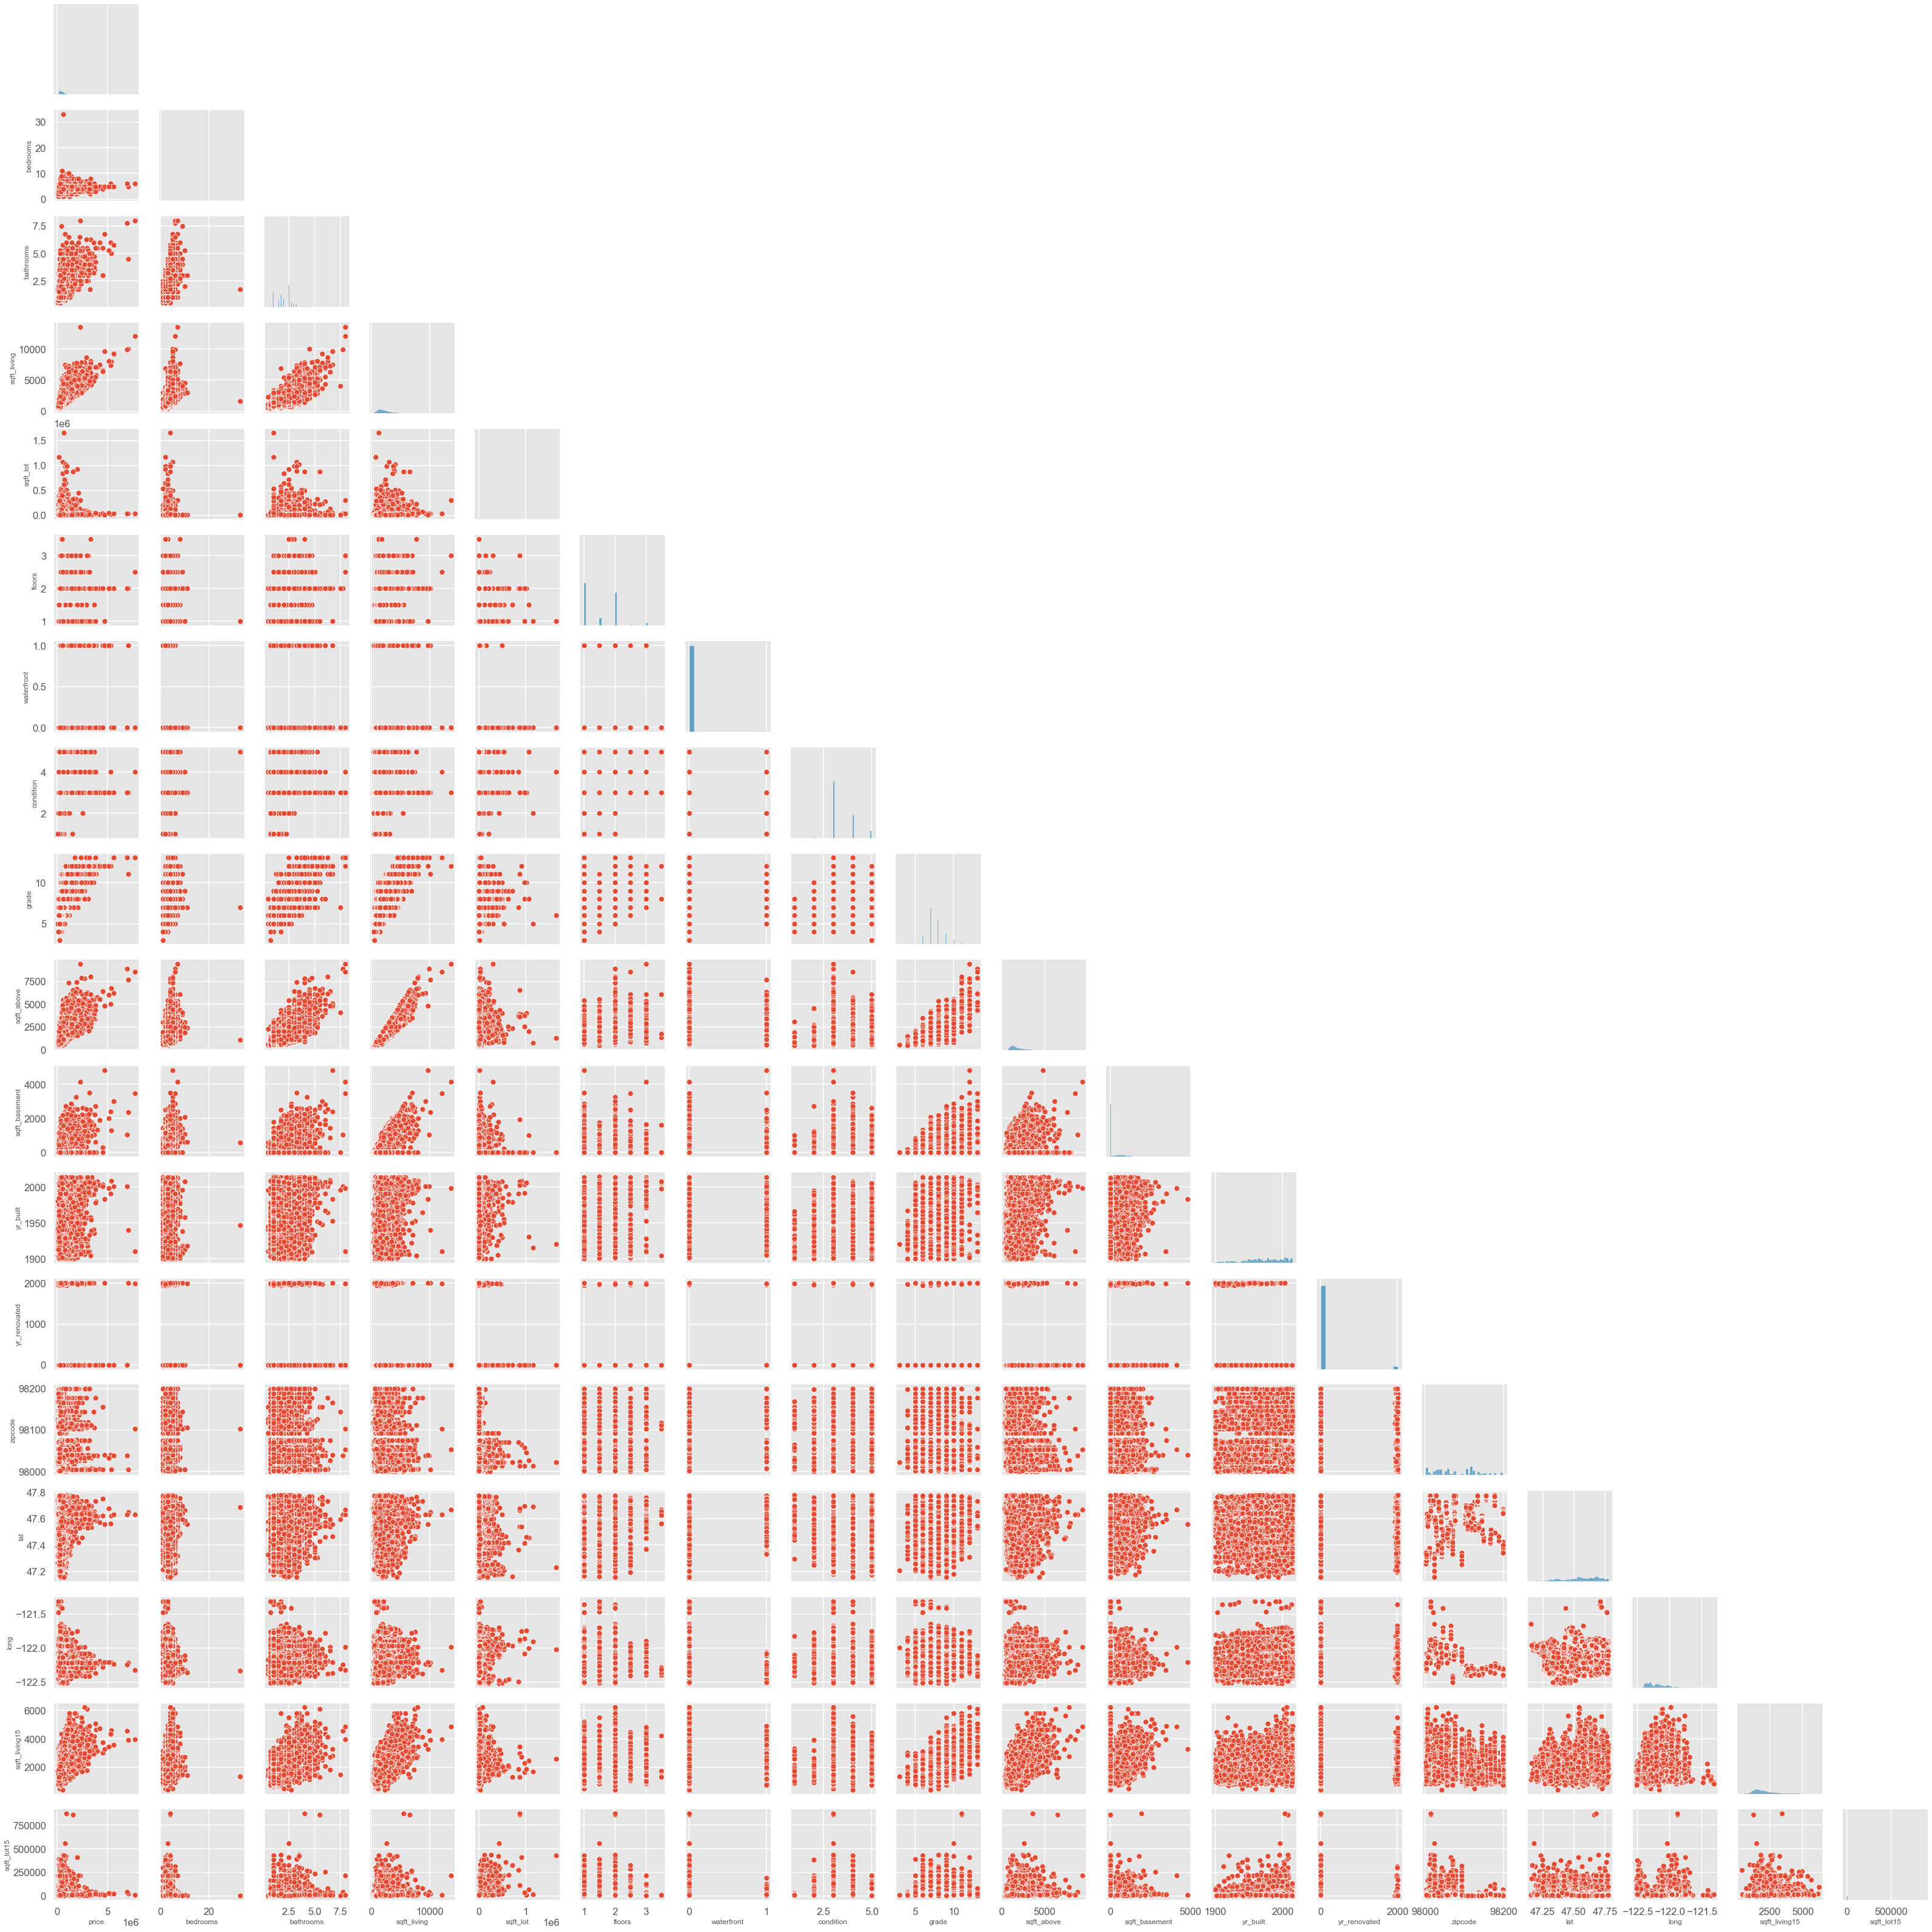

In [6574]:
#quickly scan for linearity
sns.pairplot(kc_house, diag_kind = 'hist', corner = True)

In [6575]:
#save
plt.savefig('./Data & Figures/all_pairplot')

<Figure size 432x288 with 0 Axes>

**Observation:** Quick scan for linearity
* 'sqft_living' vs. 'price', 'sqft_living' vs. 'bathrooms', 'sqft_living' vs. 'sqft_above', 'sqft_living' vs. 'sqft_living15'
* 'sqft_above' vs. 'grade'
* 'sqft_living15' vs. 'grade', 'sqft_living15' vs. 'sqft_above'
* 'price' vs. 'bedrooms', 'price' vs. 'bathrooms', 'price' vs. 'grade', 'price' vs. 'sqft_above', 'price' vs. 'sqft_living15'

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

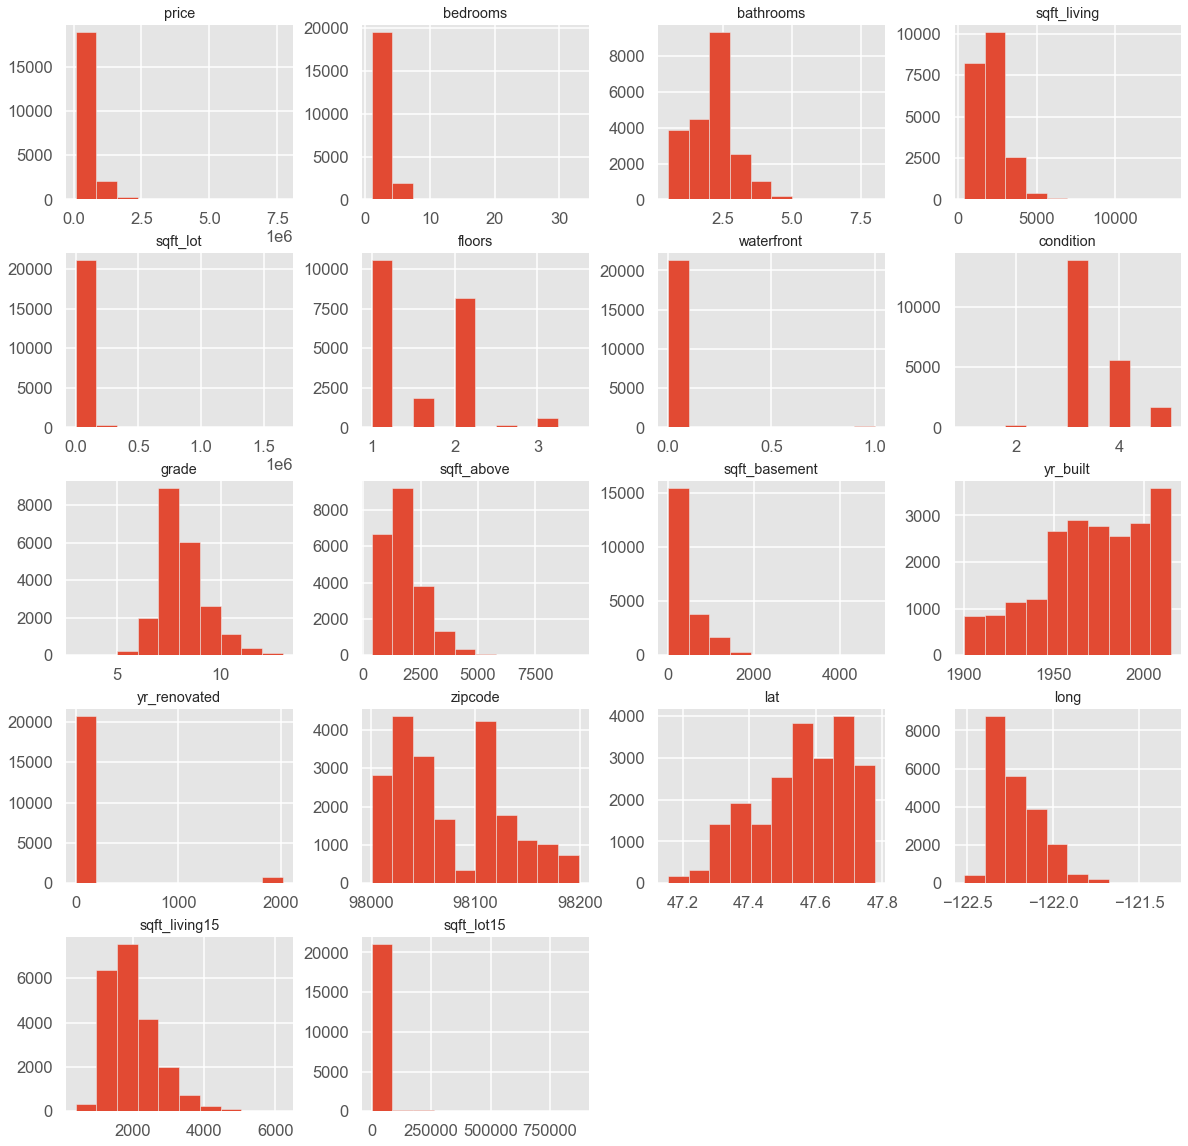

In [6576]:
#quick scan for normality and inflated '0'
kc_house.hist(figsize = (20, 20))

In [6577]:
#save
plt.savefig('./Data & Figures/all_histplot')

<Figure size 432x288 with 0 Axes>

In [6578]:
#split data into 2 groups of type continous and type categoricals and see how they behave with respect to 'price'
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

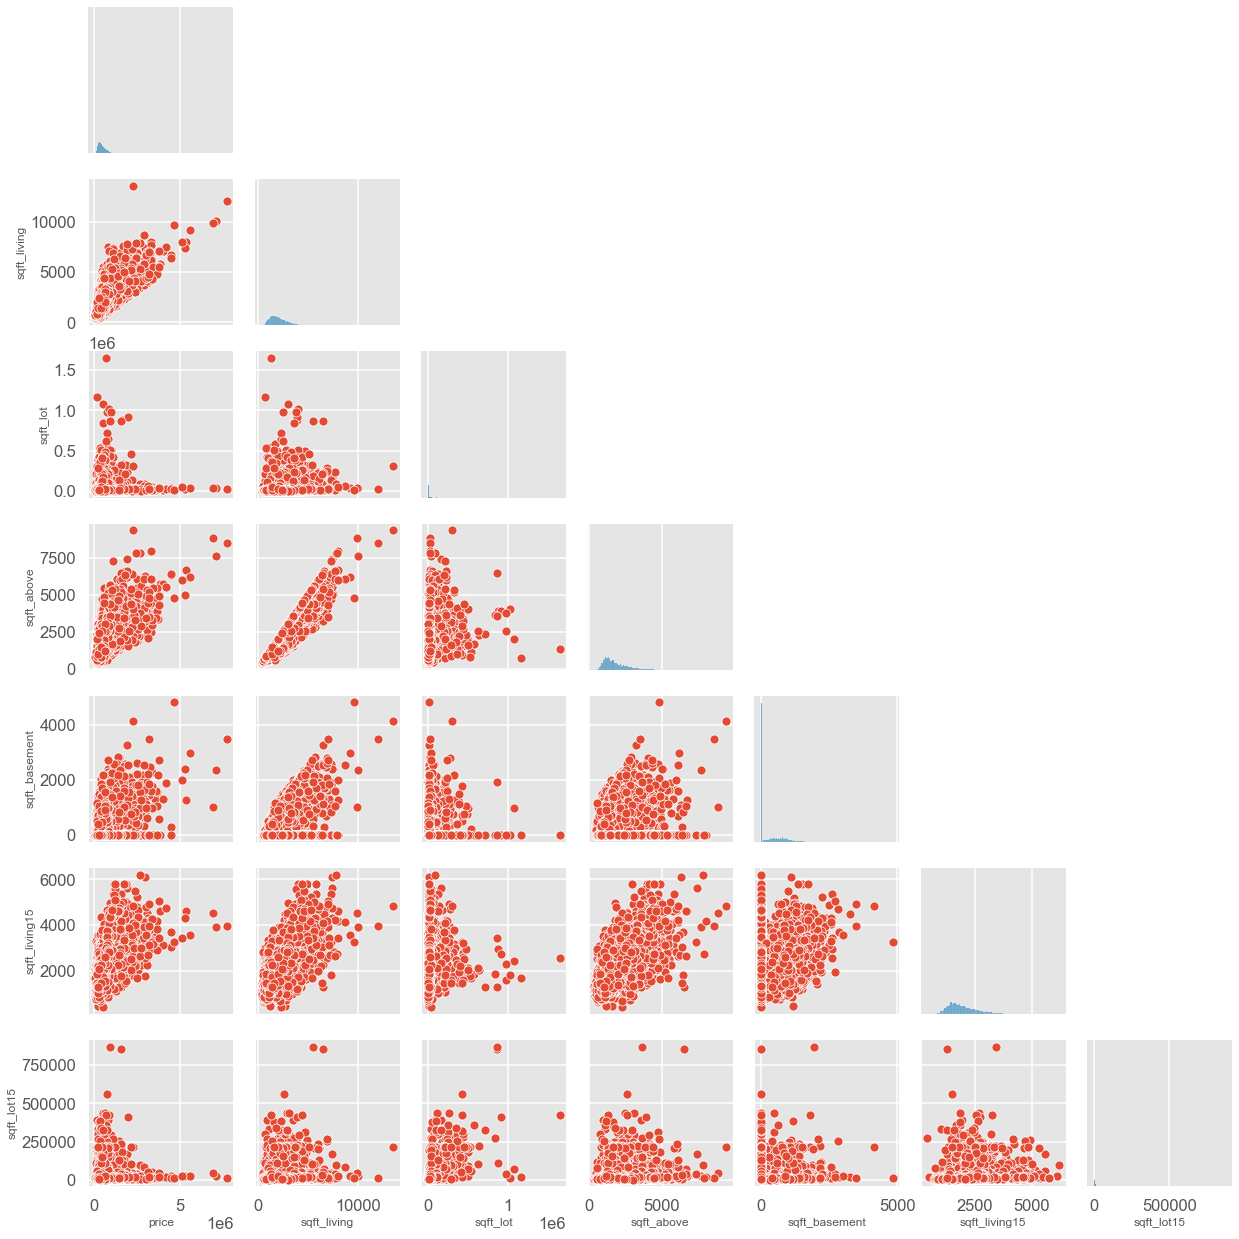

In [6579]:
#take a closer look at continuous data
sns.pairplot(kc_house[continuous], diag_kind = 'hist', corner = True)

#save
plt.savefig('./Data & Figures/continuous_pairplot')

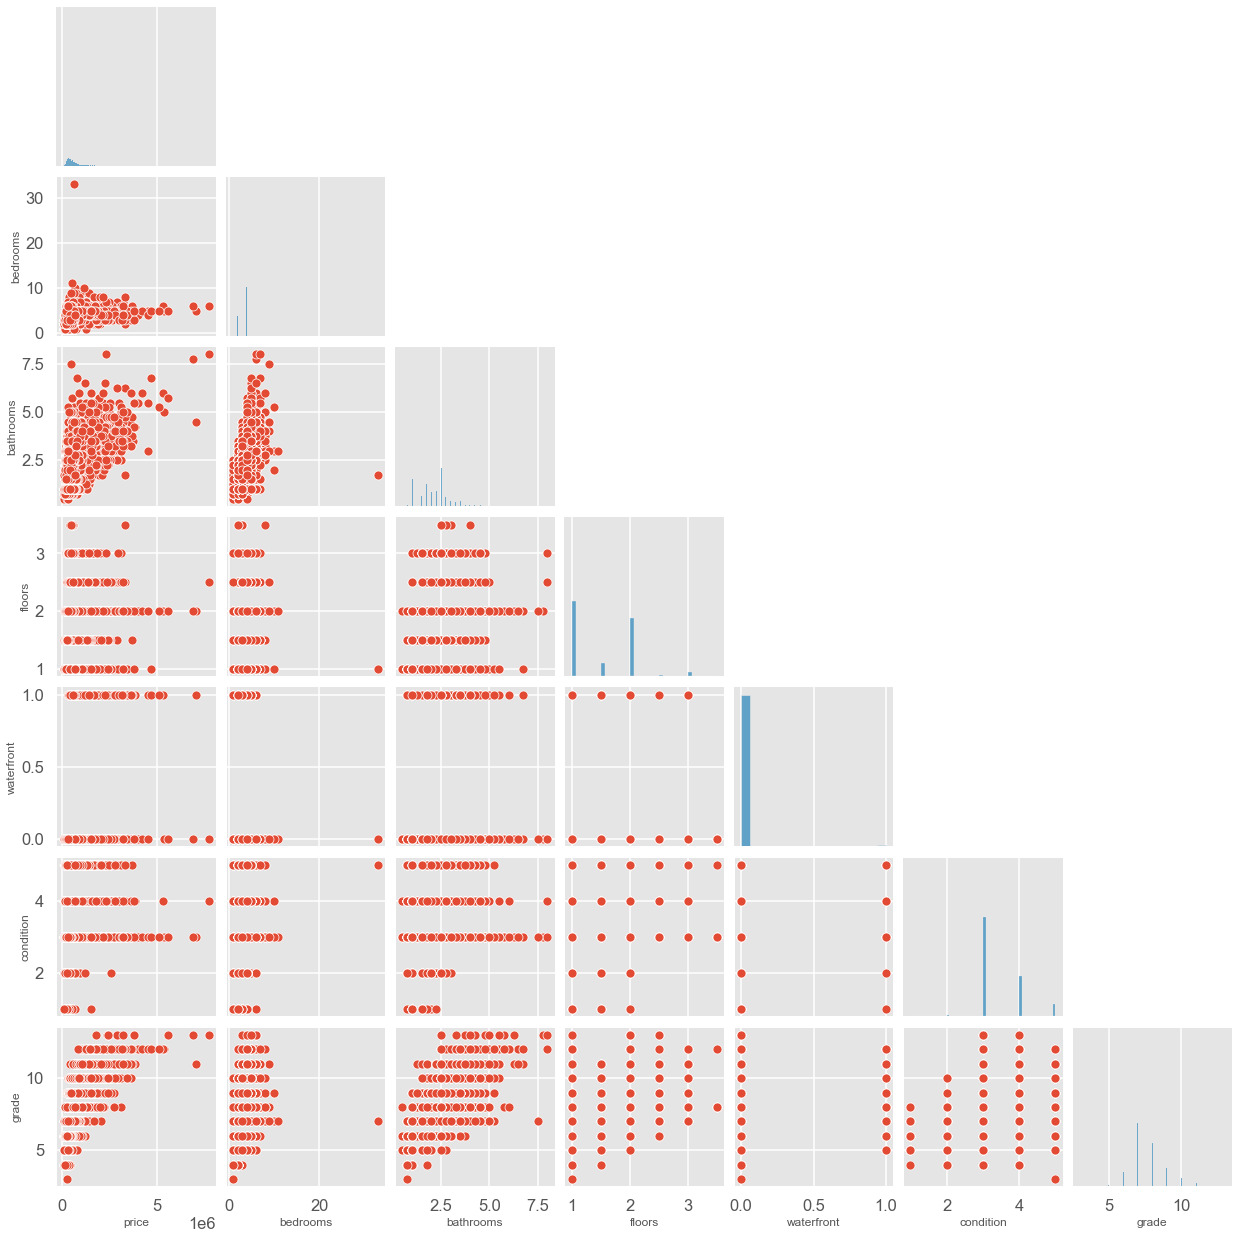

In [6580]:
#take a closer look at categoricals data
sns.pairplot(kc_house[categoricals], diag_kind = 'hist', corner = True)

#save
plt.savefig('./Data & Figures/categoricals_pairplot')

We see that 'bedrooms', 'bathrooms', and 'grade' have somewhat of a linearity with respect to 'price.' We will look at them again later to determine if they belong to continous data group or categorical data group.

## In-Depth Look into Each Feature

For this section, we will look for linearity of a feature with respect to targe variable 'price'. 

We will also look for skewness and kurtosis in our data distribution and perform data transformation and/or removal of outliers when needed. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

Kurtosis is one of the two measures that quantify shape of a distribution. Kutosis determine the volume of the outlier. Kurtosis describes the peakedness of the distribution.

* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
* High kurtosis in a data set is an indicator that data has heavy outliers.
* Low kurtosis in a data set is an indicator that data has lack of outliers.
* If kurtosis value + means pointy and — means flat.

Pearson correlation will be calculated to get correlation between a feature and the target variable 'price'
* A value = 0 implies no correlation
* A value closer to 0 implies weaker correlation
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation.

## Target Variable

### Price: 'price'

In [6581]:
#look at summary statistics & remove scientific notation
kc_house['price'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean      541272.456956
std       367719.436952
min        78000.000000
25%       323725.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

In [6582]:
#get skewness
print('Skewness:', kc_house['price'].skew()) #data is highly skewed right

#get kurtosis
print('Kurtosis:', kc_house['price'].kurtosis()) #data is leptokurtic, data has heavy outliers

Skewness: 4.032580846599345
Kurtosis: 34.63813795020617


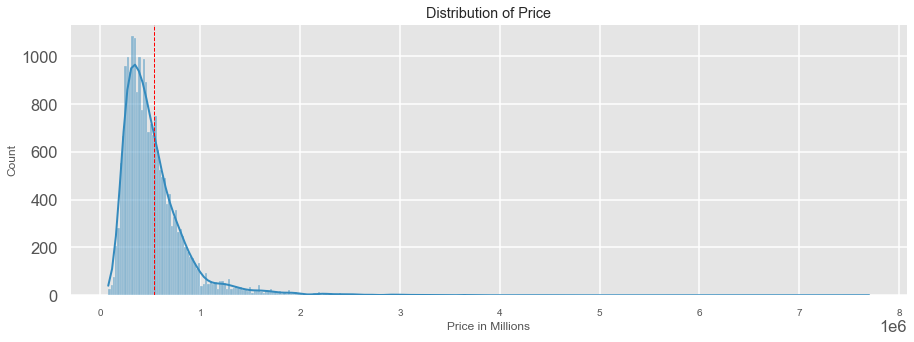

<Figure size 432x288 with 0 Axes>

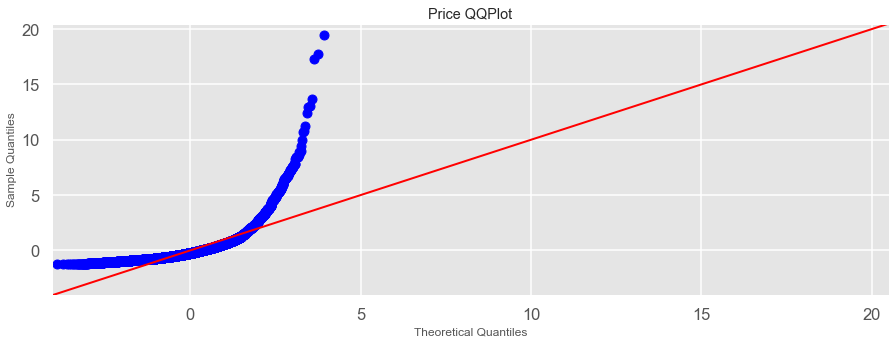

In [6583]:
#plot 'price'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price in Millions')
plt.axvline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/price_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['price'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Price QQPlot')
plt.savefig('./Data & Figures/price_qqplot')

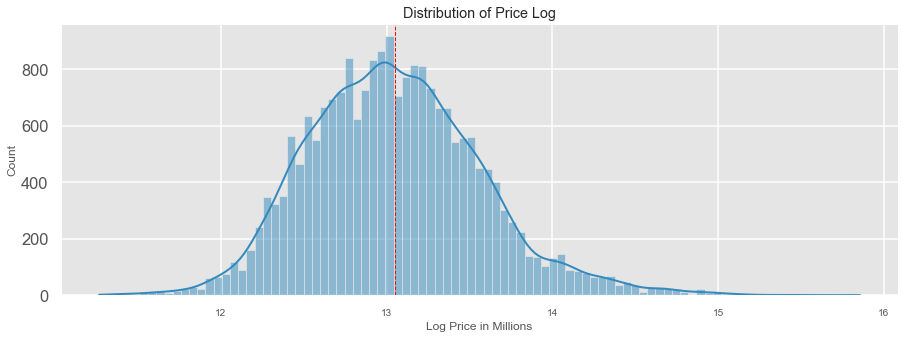

<Figure size 432x288 with 0 Axes>

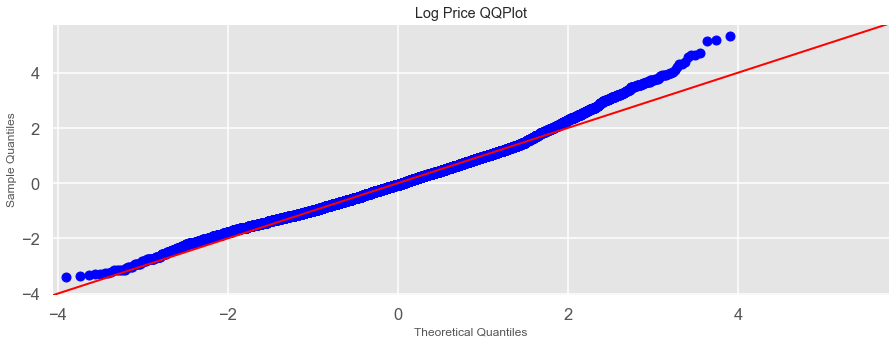

In [6584]:
#applying log transformation
kc_house['price_log'] = np.log(kc_house['price'])

#re-plot 'price'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['price_log'], kde = True)
plt.title('Distribution of Price Log')
plt.xlabel('Log Price in Millions')
plt.axvline(kc_house['price_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/price_log_distribution_histplot')

#re-check for normality
fig = sm.graphics.qqplot(kc_house['price_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Price QQPlot')
plt.savefig('./Data & Figures/price_log_qqplot')

In [6585]:
#get skewness
print('Skewness:', kc_house['price_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['price_log'].kurtosis()) #data is platykurtic and moderately spread out 

Skewness: 0.44303600060571435
Kurtosis: 0.6933408095717946


## Check for Linearity with Target Variable 'price'

## Continuous Variables

### Square footage of the home: 'sqft_living'

In [6586]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      2083.132633
std        918.808412
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: object

In [6587]:
#get skewness
print('Skewness:', kc_house['sqft_living'].skew()) #data is highly skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_living'].kurtosis()) #data is leptokurtic, data has heavy outliers

Skewness: 1.4727019951483347
Kurtosis: 5.258187001259873


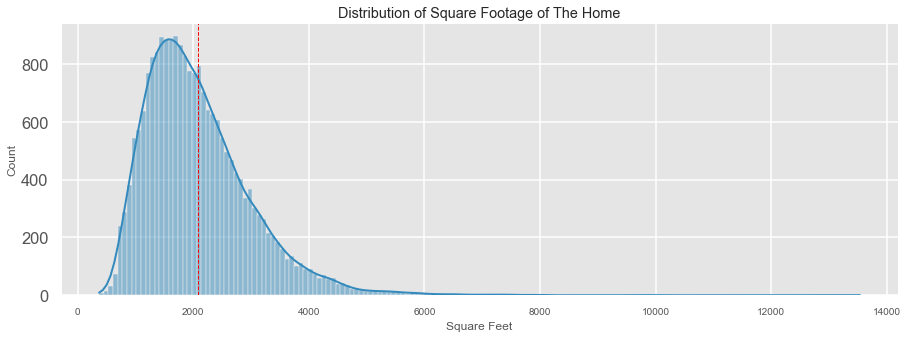

<Figure size 432x288 with 0 Axes>

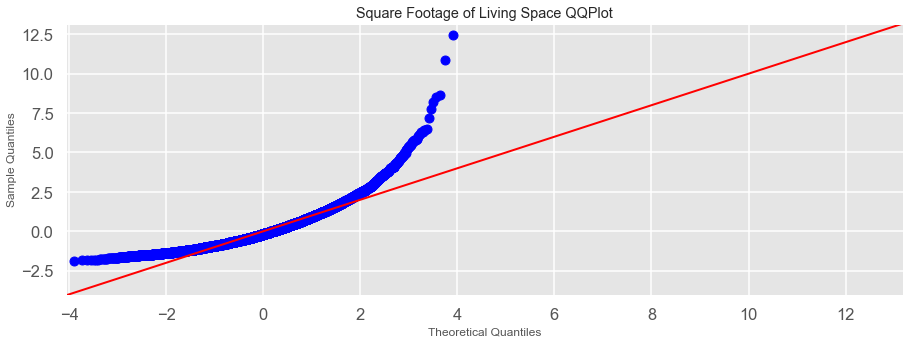

In [6588]:
#plot 'sqft_living'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living'], kde = True)
plt.title('Distribution of Square Footage of The Home')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_living'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Living Space QQPlot')
plt.savefig('./Data & Figures/sqft_living_qqtplot')

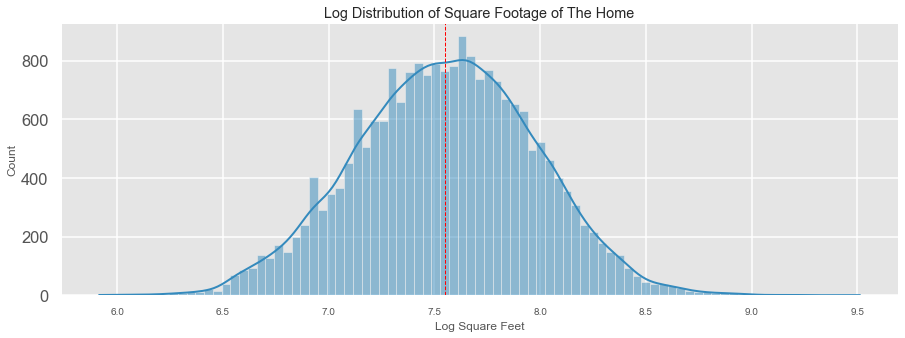

<Figure size 432x288 with 0 Axes>

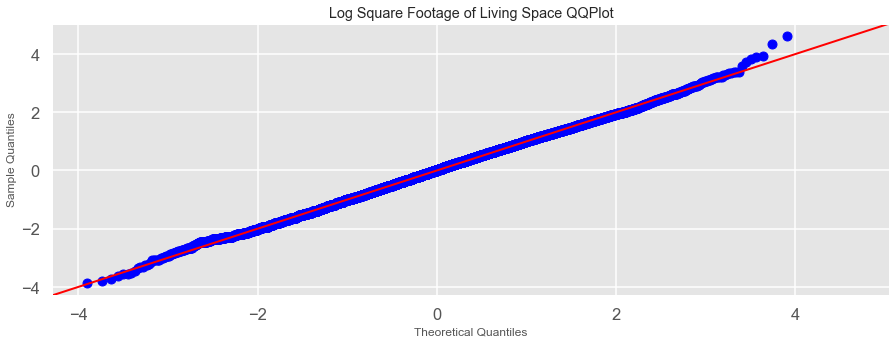

In [6589]:
#applying log transformation
kc_house['sqft_living_log'] = np.log(kc_house['sqft_living'])

#re-plot 'price_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Home')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_living_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Living Space QQPlot')
plt.savefig('./Data & Figures/sqft_living_log_qqtplot')

In [6590]:
#get skewness
print('Skewness:', kc_house['sqft_living_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_living_log'].kurtosis()) #data is platykurtic and moderately spread out

Skewness: -0.028908796802070477
Kurtosis: -0.07688511785009045


<Figure size 1080x360 with 0 Axes>

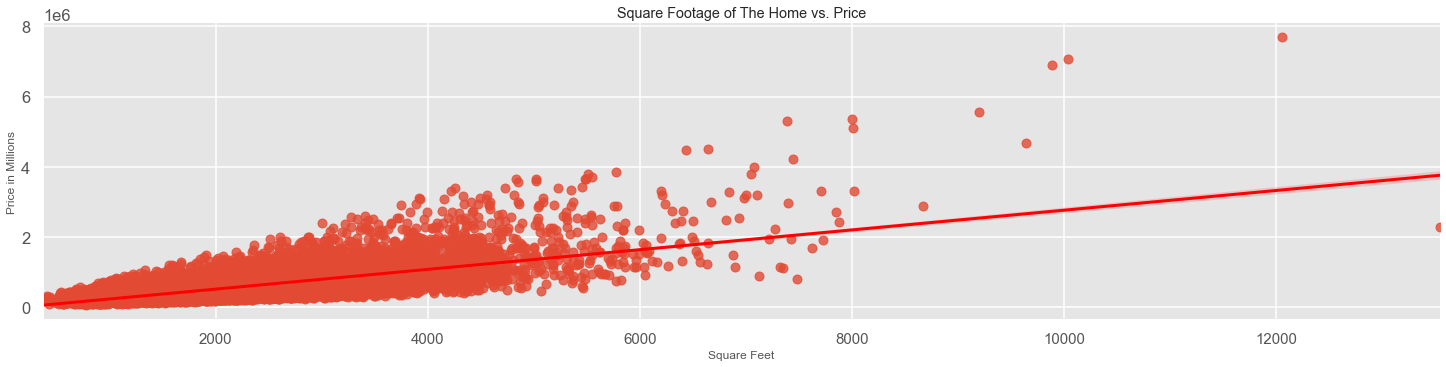

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

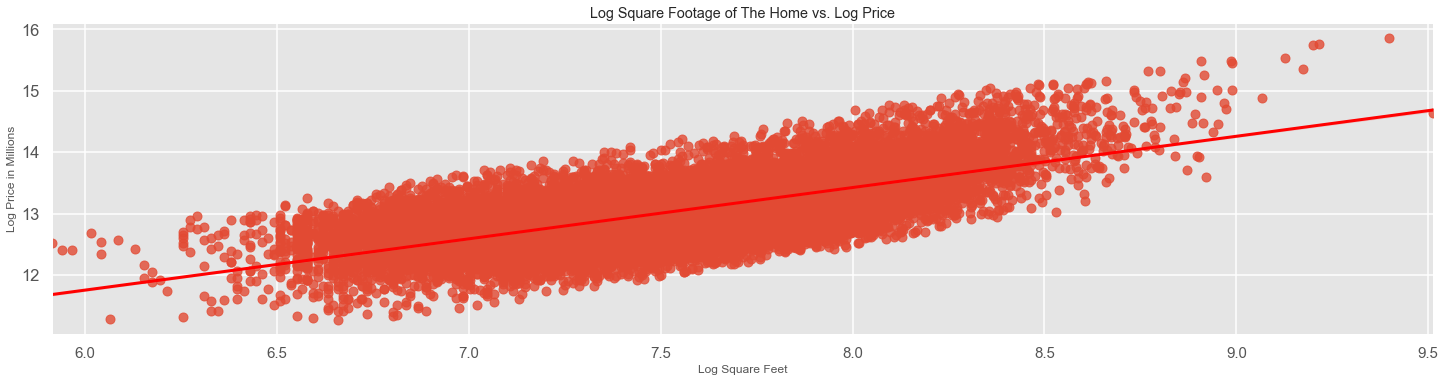

<Figure size 432x288 with 0 Axes>

In [6591]:
#plot 'price' vs. sqft_living'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Square Footage of The Home vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living_vs_price_lmplot')

#plot 'price_log' vs. sqft_living_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of The Home vs. Log Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living_log_vs_price_log_lmplot')

In [6592]:
#get correlation
kc_house[['sqft_living', 'sqft_living_log', 'price']].corr()

sqft_living  sqft_living_log     price
sqft_living         1.000000         0.954597  0.701651
sqft_living_log     0.954597         1.000000  0.611413
price               0.701651         0.611413  1.000000

### Square footage of the lot: 'sqft_lot'

In [6593]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean       15128.038002
std        41530.796838
min          520.000000
25%         5040.000000
50%         7614.000000
75%        10690.500000
max      1651359.000000
Name: sqft_lot, dtype: object

In [6594]:
#get skewness
print('Skewness:', kc_house['sqft_lot'].skew()) #data is extremely skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 13.056251852883625
Kurtosis: 284.49987477810924


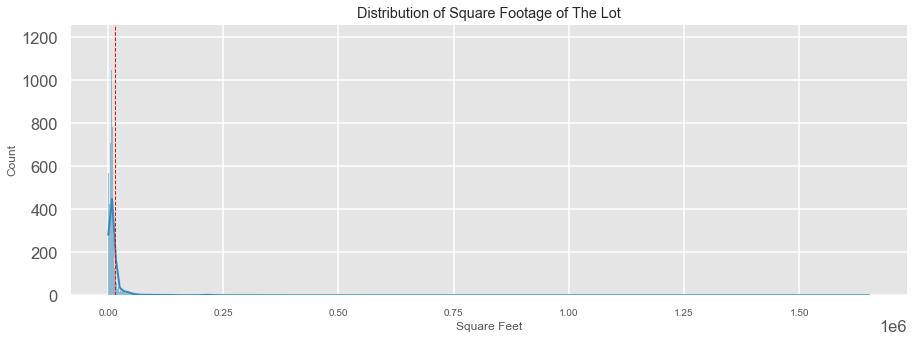

<Figure size 432x288 with 0 Axes>

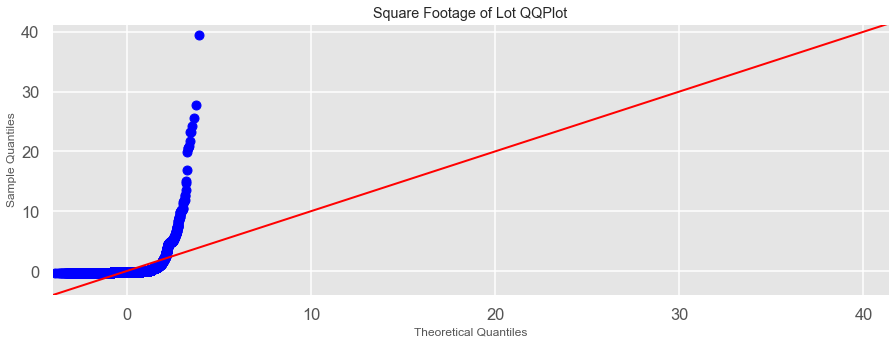

In [6595]:
#plot 'sqft_lot'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot'], kde = True)
plt.title('Distribution of Square Footage of The Lot')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_lot'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Lot QQPlot')
plt.savefig('./Data & Figures/sqft_lot_qqplot')

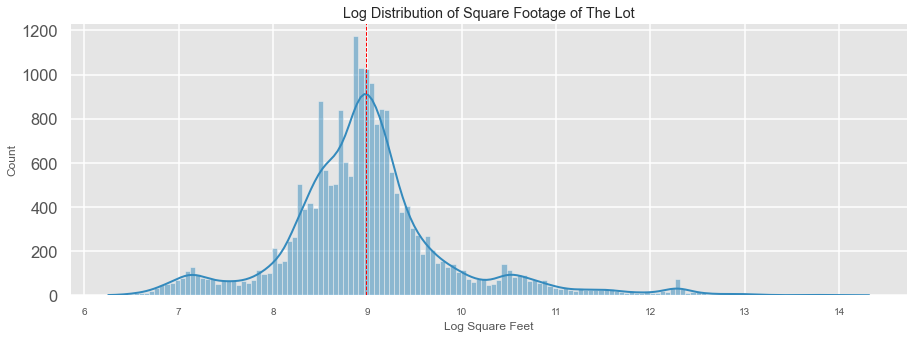

<Figure size 432x288 with 0 Axes>

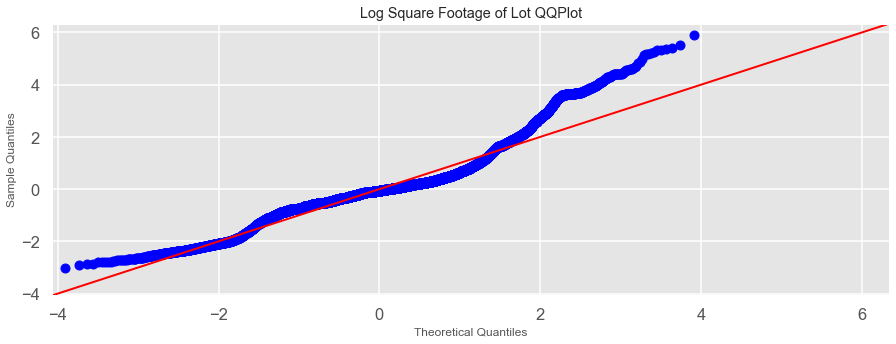

In [6596]:
#applying log transformation
kc_house['sqft_lot_log'] = np.log(kc_house['sqft_lot'])

#plot 'sqft_lot_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Lot')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_lot_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Lot QQPlot')
plt.savefig('./Data & Figures/sqft_lot__log_qqplot')

In [6597]:
#get skewness
print('Skewness:', kc_house['sqft_lot_log'].skew()) #data is heavily skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot_log'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 0.9603150668809269
Kurtosis: 3.3102493636413968


<Figure size 1080x360 with 0 Axes>

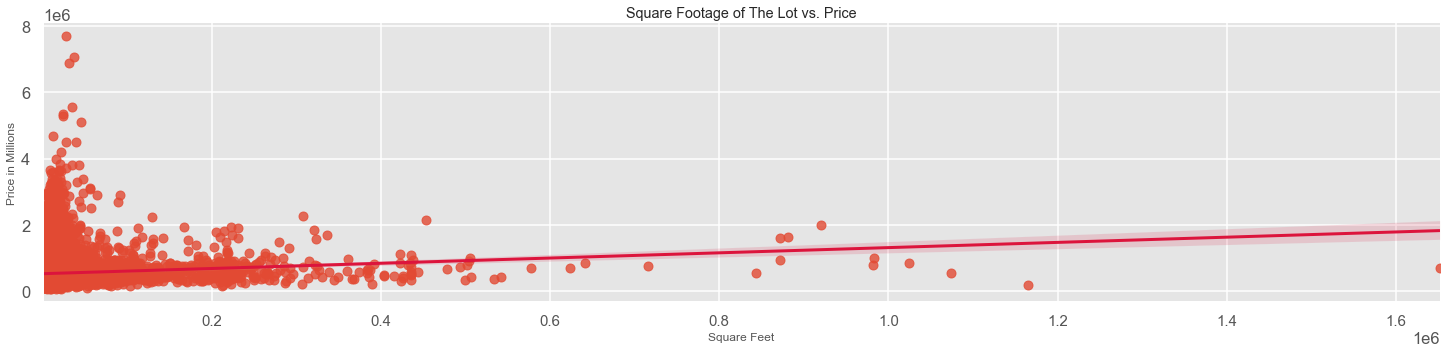

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

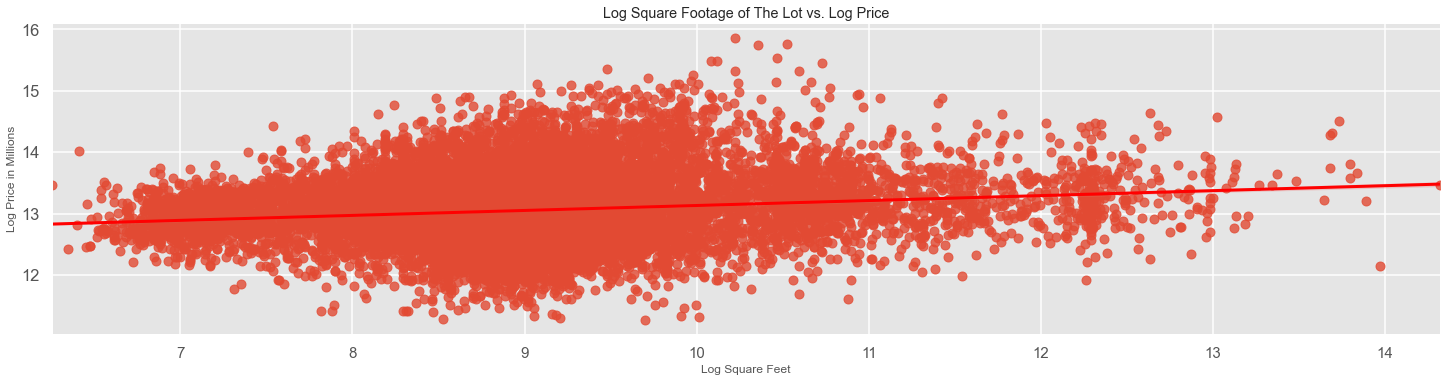

<Figure size 432x288 with 0 Axes>

In [6598]:
#plot 'price' vs. sqft_lot'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of The Lot vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_vs_price_lmplot')

#plot 'price_log' vs. sqft_lot_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of The Lot vs. Log Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_vs_price_log_lmplot')

In [6599]:
kc_house[['sqft_lot', 'sqft_lot_log', 'price']].corr()

sqft_lot  sqft_lot_log     price
sqft_lot      1.000000      0.638385  0.088936
sqft_lot_log  0.638385      1.000000  0.161567
price         0.088936      0.161567  1.000000

### Square footage of house apart from basement: 'sqft_above'

In [6600]:
#look at summary statistics & remove scientific notation
kc_house['sqft_above'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1791.170215
std        828.692965
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2220.000000
max       9410.000000
Name: sqft_above, dtype: object

In [6601]:
#get skewness
print('Skewness:', kc_house['sqft_above'].skew()) #data is heavily skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_above'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 1.4450007970330156
Kurtosis: 3.398336397421044


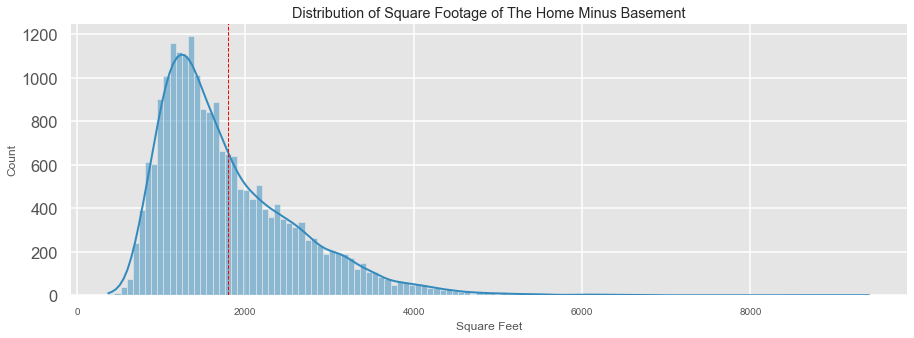

<Figure size 432x288 with 0 Axes>

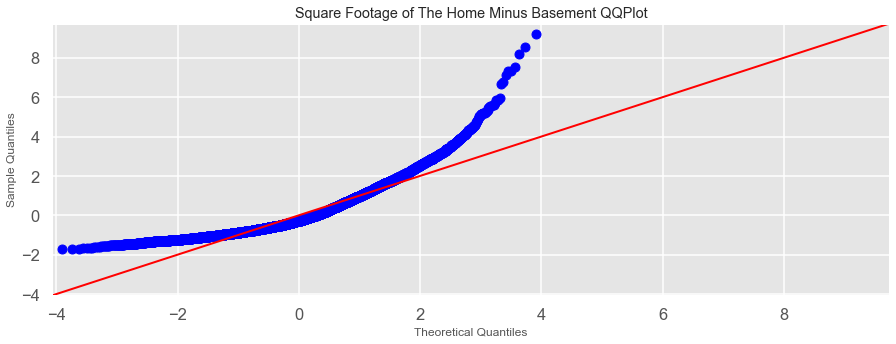

In [6602]:
#plot 'sqft_above'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_above'], kde = True)
plt.title('Distribution of Square Footage of The Home Minus Basement')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_above'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_above_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_above'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of The Home Minus Basement QQPlot')
plt.savefig('./Data & Figures/sqft_above_qqplot')

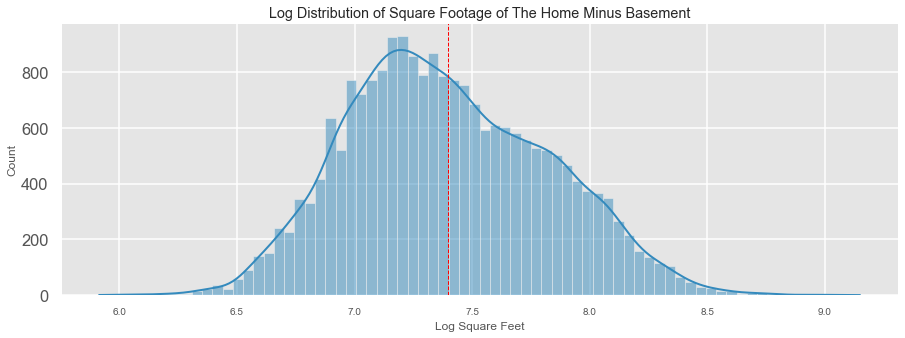

<Figure size 432x288 with 0 Axes>

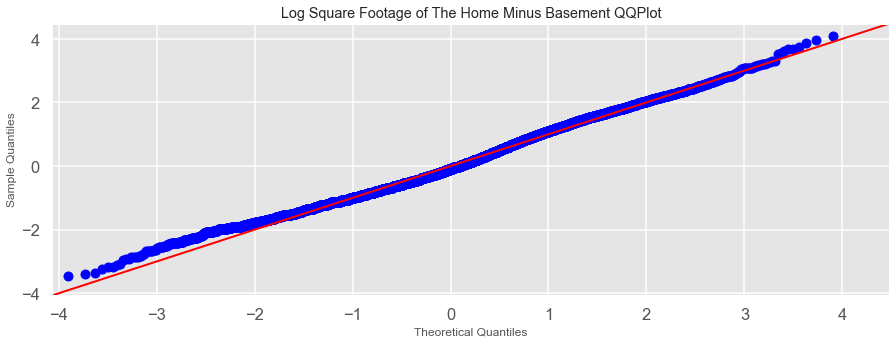

In [6603]:
#applying log transformation
kc_house['sqft_above_log'] = np.log(kc_house['sqft_above'])

#plot 'sqft_above_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_above_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Home Minus Basement')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_above_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_above_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_above_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of The Home Minus Basement QQPlot')
plt.savefig('./Data & Figures/sqft_above_log_qqplot')

In [6604]:
#get skewness
print('Skewness:', kc_house['sqft_above_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_above_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.2568298510957252
Kurtosis: -0.33456267538943996


<Figure size 1080x360 with 0 Axes>

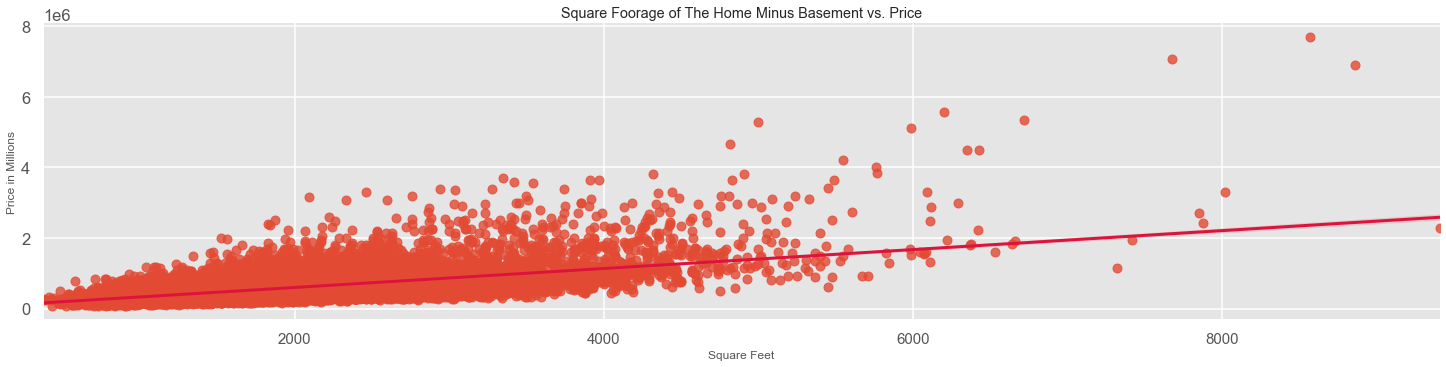

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

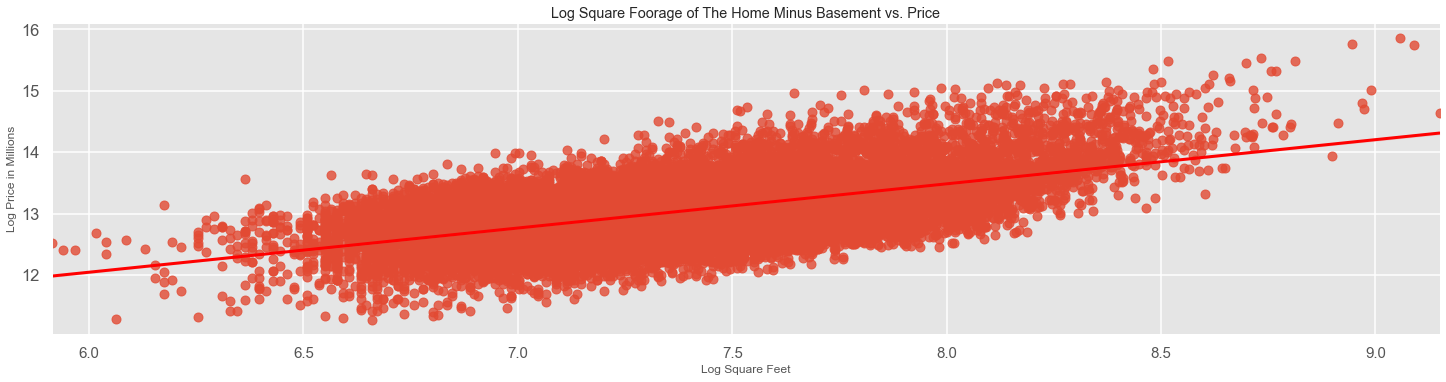

<Figure size 432x288 with 0 Axes>

In [6605]:
#plot 'price' vs. sqft_above'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_above_vs_price_lmplot')

#plot 'price_log' vs. sqft_above_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_above_log_vs_price_log_lmplot')

In [6606]:
kc_house[['sqft_above', 'sqft_above_log', 'price']].corr()

sqft_above  sqft_above_log     price
sqft_above        1.000000        0.962524  0.604916
sqft_above_log    0.962524        1.000000  0.542012
price             0.604916        0.542012  1.000000

### Square footage of basement: 'sqft_basement'

In [6607]:
#look at summary statistics & remove scientific notation
kc_house['sqft_basement'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean       291.962418
std        442.875502
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: object

In [6608]:
#get skewness
print('Skewness:', kc_house['sqft_basement'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_basement'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 1.5757888858145297
Kurtosis: 2.708184540482314


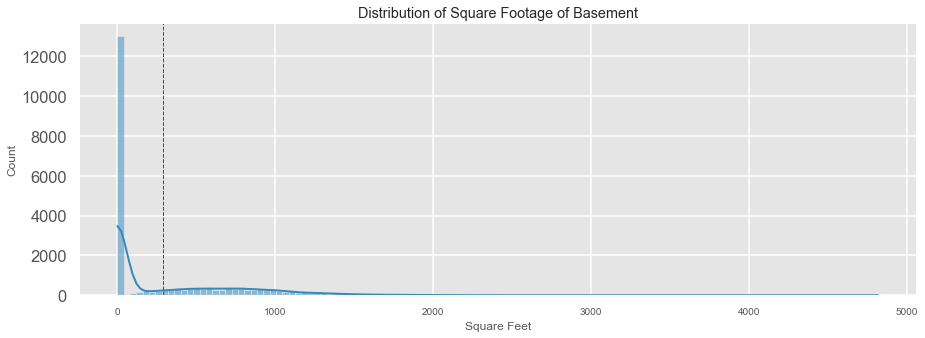

<Figure size 432x288 with 0 Axes>

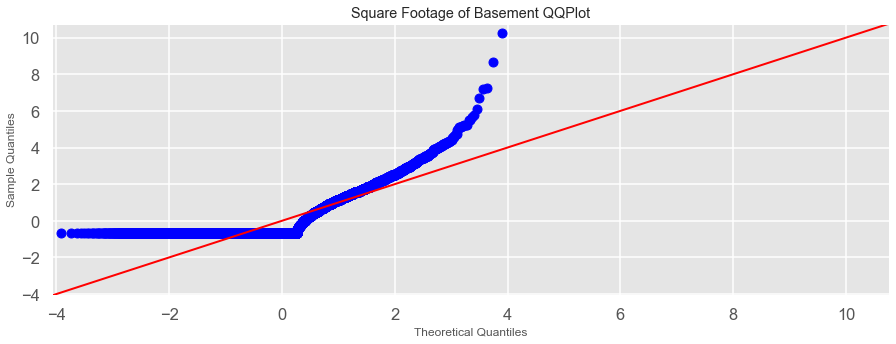

In [6609]:
#plot 'sqft_basement'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_basement'], kde = True)
plt.title('Distribution of Square Footage of Basement')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_basement'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_basement_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_basement'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Basement QQPlot')
plt.savefig('./Data & Figures/sqft_basement_qqplot')

There are inflated value of 0 since many houses have no basement. Zero-inflated variable is cumbersome to work with so we will classify 'sqft_basement' as dichotomous variable.

In [6610]:
#classify 'sqft_basement' as dichotomous variable and will treat this as categorical variable
kc_house['basement'] = kc_house['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

#drop 'sqft_basement'
kc_house.drop('sqft_basement', axis = 1, inplace = True)

#view
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  ...  zipcode      lat     long  \
15937     1.0         0.0          3      6  ...    98166  47.4697 -122.351   
20963     1.5         0.0          3      9  ...    98027  47.5446 -122.018   

       sqft_living15  sqft_lot15  price_log  sqft_living_log  sqft_lot_log  \
15937           1000        8100  12.502281         7.185387      8.999619   
20963           1440        1188  12.898970         7.251345      6.912743   

       sqft_above_log  basement  
15937        6.779922         1  
20963        6.802395         1  

[2 rows x 23 columns]

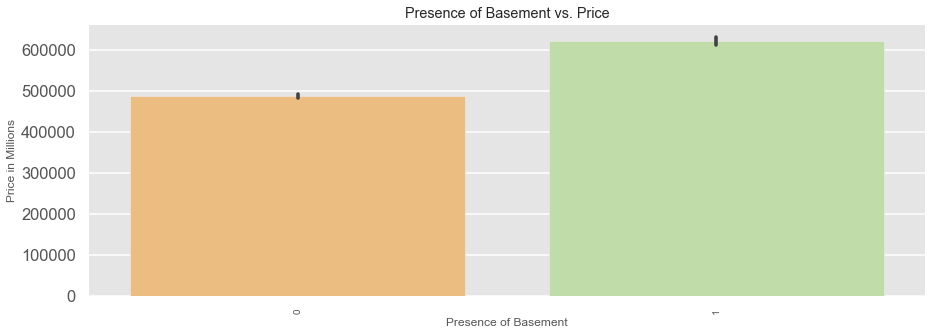

<Figure size 432x288 with 0 Axes>

In [6611]:
#plot 'basement' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['basement'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Presence of Basement vs. Price')
plt.xlabel('Presence of Basement')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/basement_vs_price_barplot')

The presence of a basement increases the value of the home.

In [6612]:
#get correlation
kc_house[['basement', 'price']].corr()

basement     price
basement  1.000000  0.179724
price     0.179724  1.000000

### Square footage of interior housing living space for the nearest 15 neighbors: 'sqft_living15'

In [6613]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living15'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1988.384080
std        685.537057
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: object

In [6614]:
#get skewness
print('Skewness:', kc_house['sqft_living15'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_living15'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 1.1045308883004101
Kurtosis: 1.587944456068449


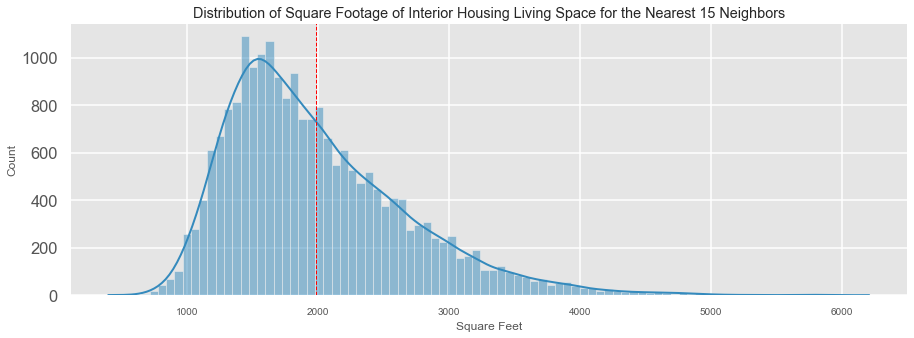

<Figure size 432x288 with 0 Axes>

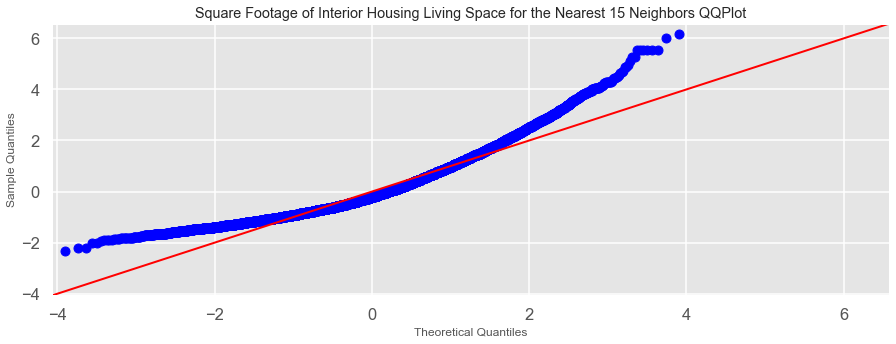

In [6615]:
#plot 'sqft_living15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living15'], kde = True)
plt.title('Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_living15'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living15'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_living15_qqplot')

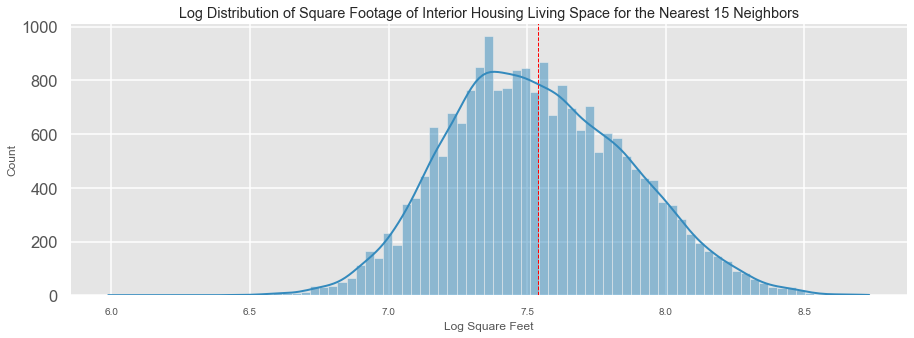

<Figure size 432x288 with 0 Axes>

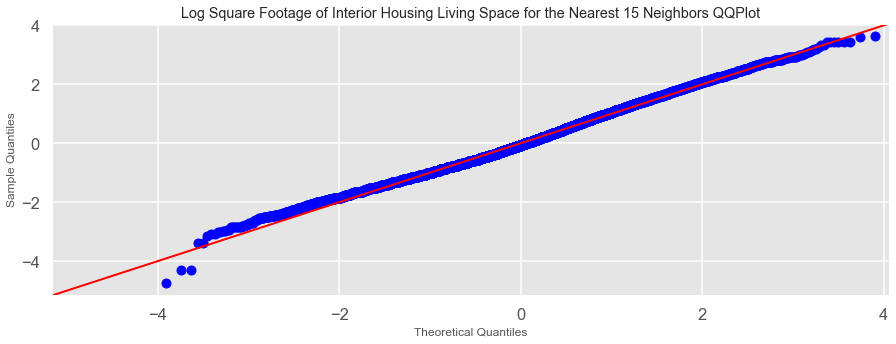

In [6616]:
#applying log transformation
kc_house['sqft_living15_log'] = np.log(kc_house['sqft_living15'])

#plot 'sqft_living15_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living15_log'], kde = True)
plt.title('Log Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_living15_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living15_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_living15_log_qqplot')

In [6617]:
#get skewness
print('Skewness:', kc_house['sqft_living15_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_living15_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.20398810339269602
Kurtosis: -0.21021077047827896


<Figure size 1080x360 with 0 Axes>

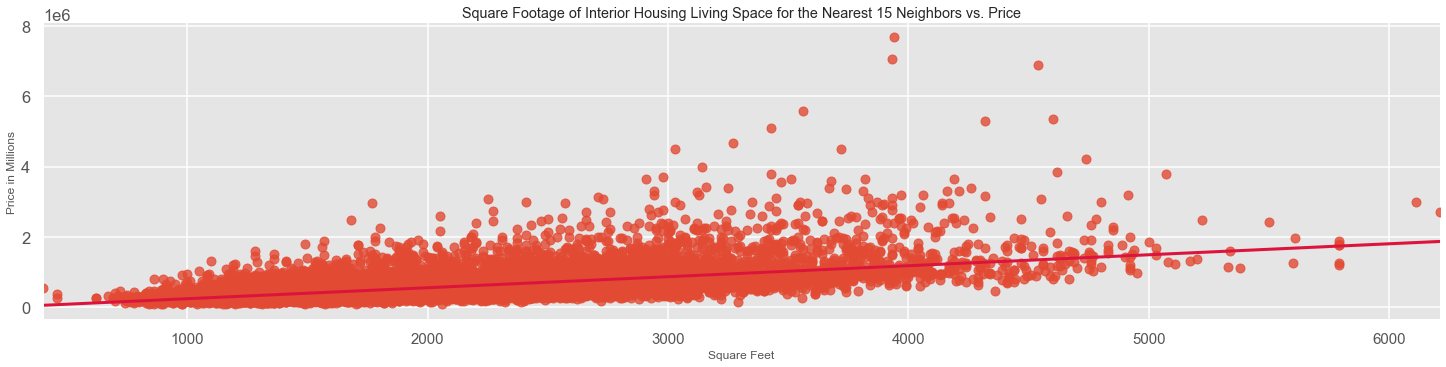

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

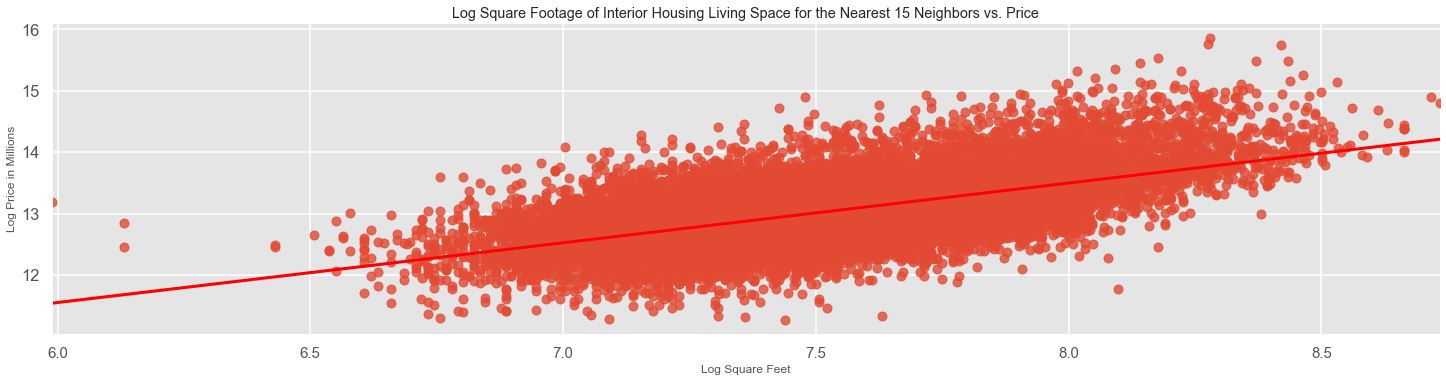

<Figure size 432x288 with 0 Axes>

In [6618]:
#plot 'price' vs. sqft_living15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_vs_price_lmplot')

#plot 'price_log' vs. sqft_living15_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_log_vs_price_log_lmplot')

In [6619]:
kc_house[['sqft_living15', 'sqft_living15_log', 'price']].corr()

sqft_living15  sqft_living15_log     price
sqft_living15           1.000000           0.976833  0.584227
sqft_living15_log       0.976833           1.000000  0.542896
price                   0.584227           0.542896  1.000000

### Square footage of the land lots of the nearest 15 neighbors: 'sqft_lot15'

In [6620]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot15'].describe().apply(lambda x: format(x, 'f'))

count     21420.000000
mean      12775.718161
std       27345.621867
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10086.250000
max      871200.000000
Name: sqft_lot15, dtype: object

In [6621]:
#get skewness
print('Skewness:', kc_house['sqft_lot15'].skew()) #data is extremely skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot15'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 9.51304456409537
Kurtosis: 150.95644529520288


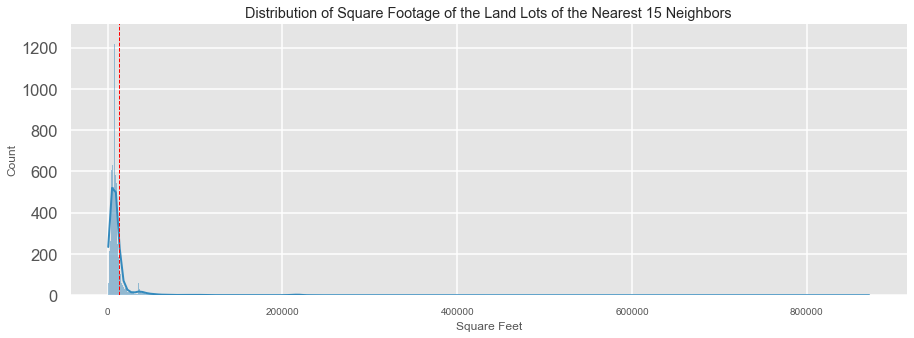

<Figure size 432x288 with 0 Axes>

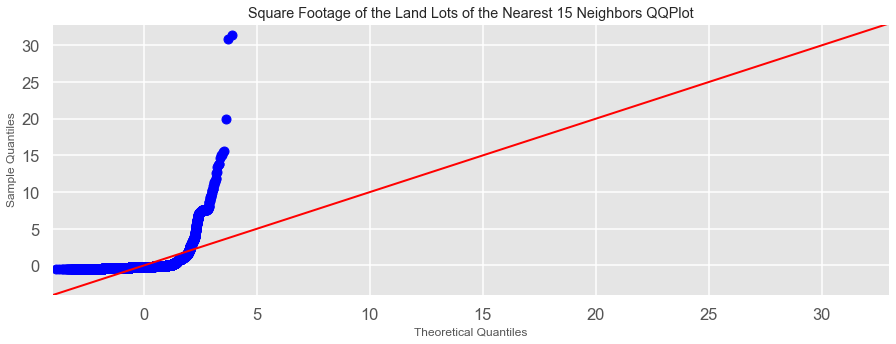

In [6622]:
#plot 'sqft_lot15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot15'], kde = True)
plt.title('Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_lot15'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot15'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_lot15_qqplot')

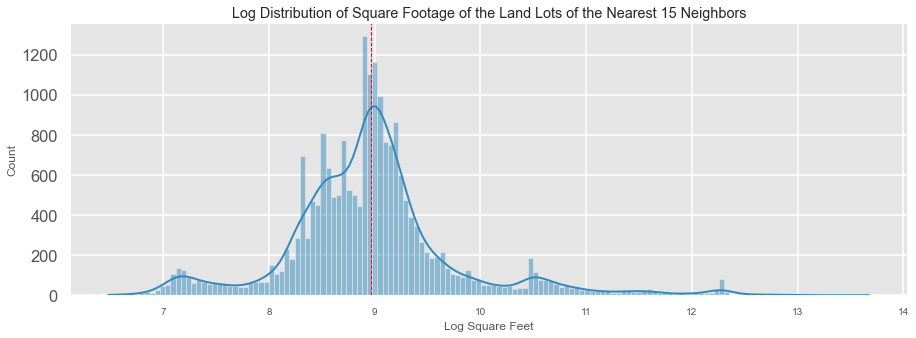

<Figure size 432x288 with 0 Axes>

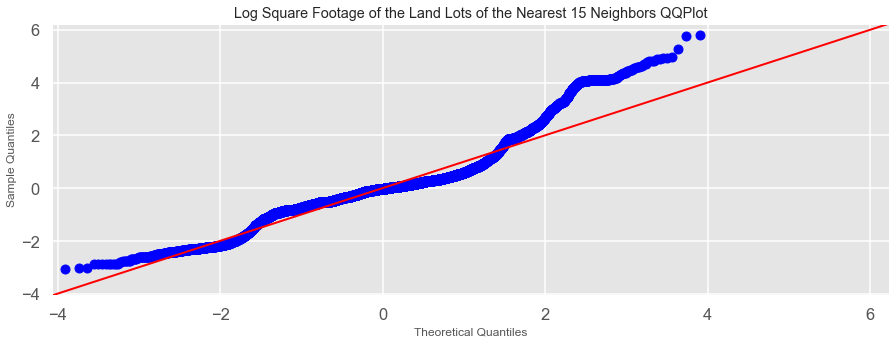

In [6623]:
#applying log transformation
kc_house['sqft_lot15_log'] = np.log(kc_house['sqft_lot15'])

#plot 'sqft_lot15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot15_log'], kde = True)
plt.title('Log Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_lot15_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot15_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of the Land Lots of the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_lot15_log_qqplot')

In [6624]:
#get skewness
print('Skewness:', kc_house['sqft_lot15_log'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot15_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.964778965757191
Kurtosis: 3.547795859057869


<Figure size 1080x360 with 0 Axes>

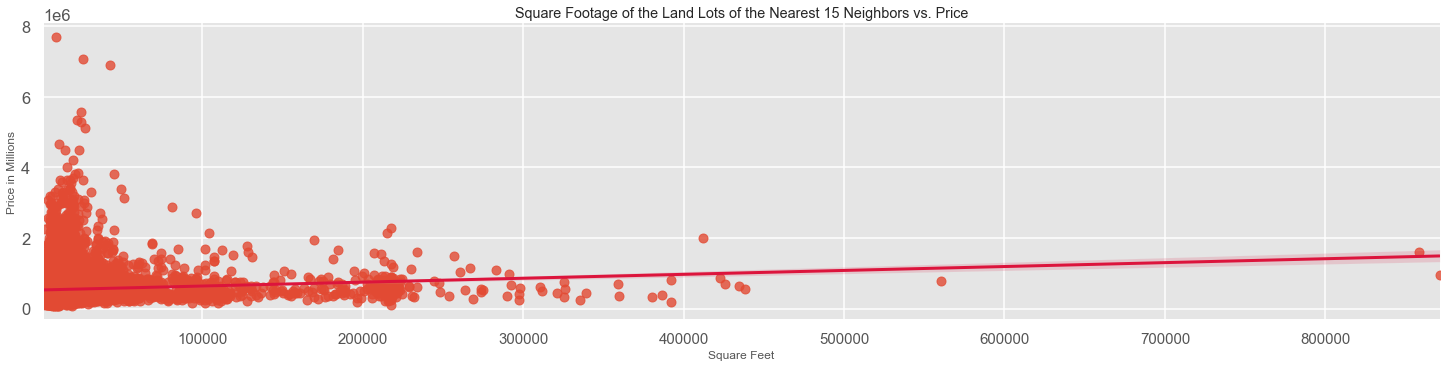

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

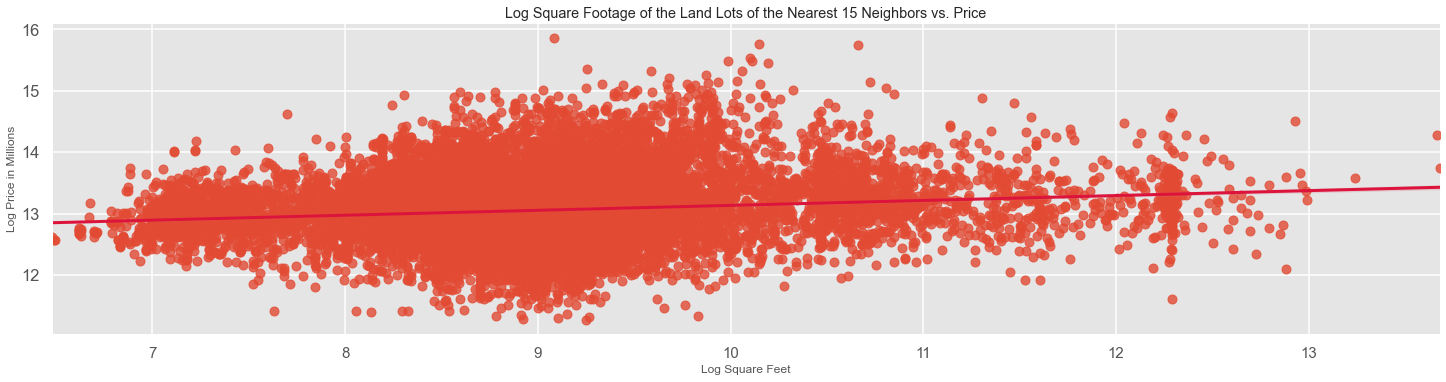

<Figure size 432x288 with 0 Axes>

In [6625]:
#plot 'price' vs. sqft_lot15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_vs_price_lmplot')

#plot 'price_log' vs. sqft_lot15_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Log Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_log_vs_price_log_lmplot')

In [6626]:
kc_house[['sqft_lot15', 'sqft_lot15_log', 'price']].corr()

sqft_lot15  sqft_lot15_log     price
sqft_lot15        1.000000        0.701399  0.082247
sqft_lot15_log    0.701399        1.000000  0.148035
price             0.082247        0.148035  1.000000

## Ordinal variables

### Number of Bedrooms: 'bedrooms'

In [6627]:
kc_house['bedrooms'].nunique()

12

In [6628]:
y_values = kc_house['bedrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [6629]:
#get skewness
print('Skewness:', kc_house['bedrooms'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['bedrooms'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 2.0399818162187944
Kurtosis: 50.414154421357274


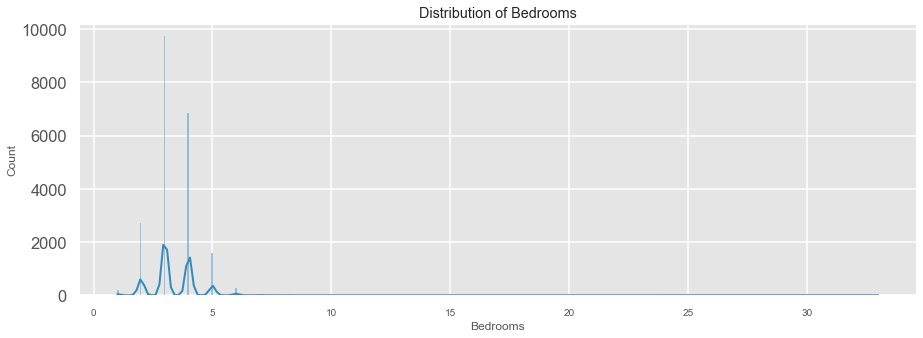

<Figure size 432x288 with 0 Axes>

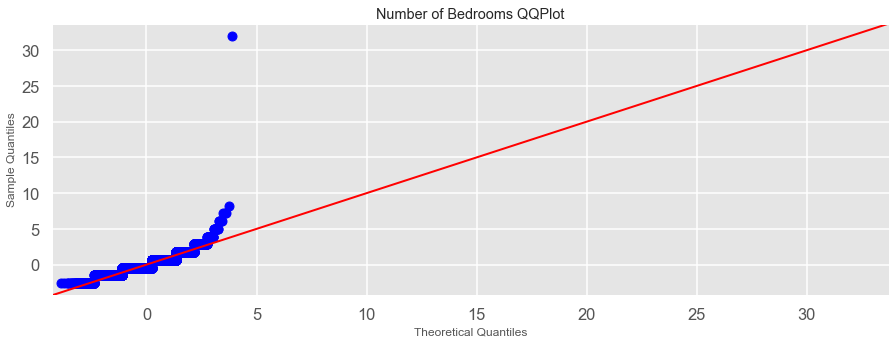

In [6630]:
#histplot 'bedroom' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['bedrooms'], kde = True)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/bedrooms_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['bedrooms'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Number of Bedrooms QQPlot')
plt.savefig('./Data & Figures/bedrooms_qqplot')

Majority of the houses have 3 bedrooms. 

<Figure size 1080x1080 with 0 Axes>

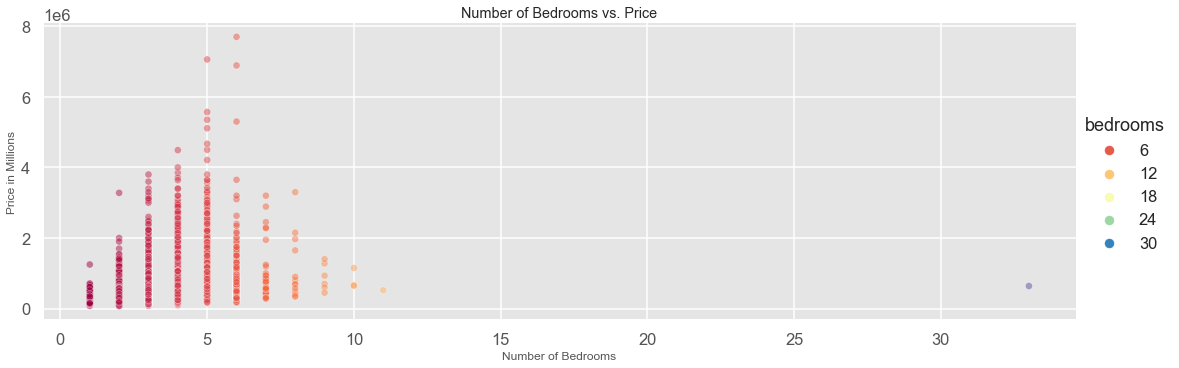

<Figure size 432x288 with 0 Axes>

In [6631]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

We can see there is an outlier at 30+ number of bedrooms. 

In [6632]:
#check out the outlier at 9+ number of bedrooms
kc_house[kc_house['bedrooms'] > 9]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
19239 2014-12-29   660000.0        10       3.00         2920      3745   
15147 2014-10-29   650000.0        10       2.00         3610     11914   
15856 2014-06-25   640000.0        33       1.75         1620      6000   
8748  2014-08-21   520000.0        11       3.00         3000      4960   
13301 2014-08-14  1150000.0        10       5.25         4590     10920   

       floors  waterfront  condition  grade  ...     long  sqft_living15  \
19239     2.0         0.0          4      7  ... -122.320           1810   
15147     2.0         0.0          4      7  ... -122.175           2040   
15856     1.0         0.0          5      7  ... -122.331           1330   
8748      2.0         0.0          3      7  ... -122.363           1420   
13301     1.0         0.0          3      9  ... -122.113           2730   

       sqft_lot15  price_log  sqft_living_log  sqft_lot_log  sqft_above_log  \
19239        3745  13.399995         7.979339      8.228177        7.528332   
15147       11914  13.384728         8.191463      9.385469        8.009695   
15856        4700  13.369223         7.390181      8.699515        6.946976   
8748         4960  13.161584         8.006368      8.509161        7.783224   
13301       10400  13.955273         8.431635      9.298351        7.824046   

       basement  sqft_living15_log  sqft_lot15_log  
19239         1           7.501082        8.228177  
15147         1           7.620705        9.385469  
15856         1           7.192934        8.455318  
8748          1           7.258412        8.509161  
13301         1           7.912057        9.249561  

[5 rows x 25 columns]

We see that the house with 33 bedrooms only has 1.75 bathrooms, which makes little sense. There are also houses with 10-11 bedrooms with only 2-3 bathrroms, which also makes little sense. We can assume that there is a typo in '33' or in '1.75': 3 bedrooms with 1.75 bathrooms, 13 bedrooms with 1.75 bathrooms or 33 bedrooms with 17.5 bathrooms, etc. Since this is the outlier that impacts our data spread, we will replace with the median value of 'bedrooms'.

In [6633]:
#replace 33-bedrooms data with median value
kc_house.loc[kc_house['bedrooms'] == 33, 'bedrooms'] = kc_house['bedrooms'].median()

#check again to see if it is gone
kc_house.loc[kc_house['bedrooms'] == 33]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price_log, sqft_living_log, sqft_lot_log, sqft_above_log, basement, sqft_living15_log, sqft_lot15_log]
Index: []

[0 rows x 25 columns]

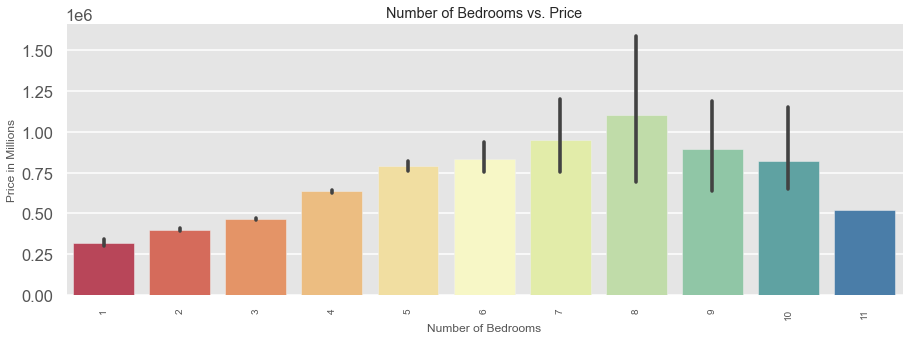

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

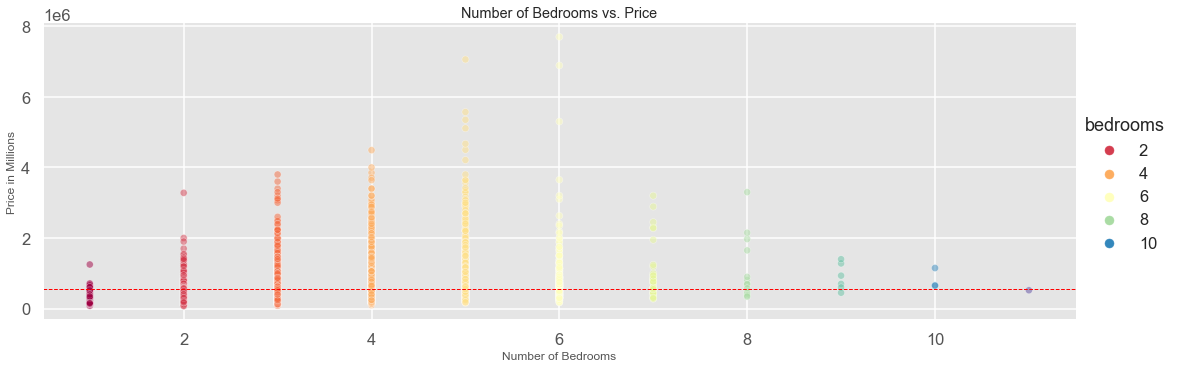

<Figure size 432x288 with 0 Axes>

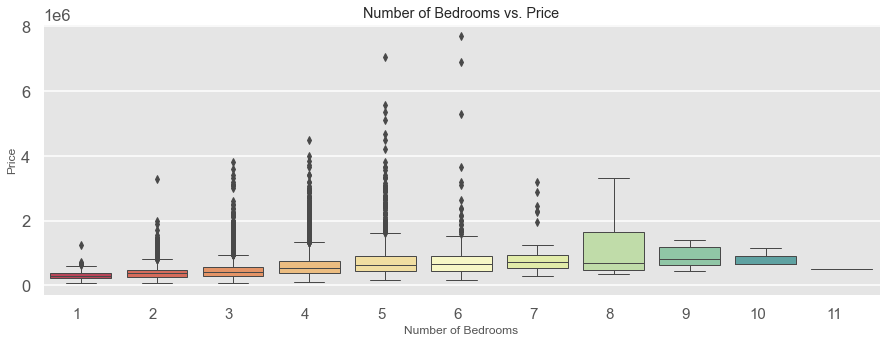

<Figure size 432x288 with 0 Axes>

In [6634]:
#barplot 'bedrooms' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['bedrooms'], kc_house['price'], 
            palette = "Spectral")
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/bedrooms_vs_price_barplot')

#relplot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

#boxplot 'bedrooms' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['bedrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/bedrooms_vs_price_boxplot')

Extra bedrooms add extra values to the home. But after 6, the price starts to plateu or even decreases.

In [6635]:
kc_house[['bedrooms', 'price']].corr()

bedrooms     price
bedrooms  1.000000  0.316933
price     0.316933  1.000000

### Number of Bathrooms: 'bathrooms'

In [6636]:
#get summary statistics
kc_house['bathrooms'].describe()

count    21420.000000
mean         2.118429
std          0.768720
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [6637]:
kc_house['bathrooms'].nunique()

29

In [6638]:
y_values = kc_house['bathrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.50       2
8.00       2
6.25       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [6639]:
#get skewness
print('Skewness:', kc_house['bathrooms'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['bathrooms'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 0.5188980554943093
Kurtosis: 1.2909043161980165


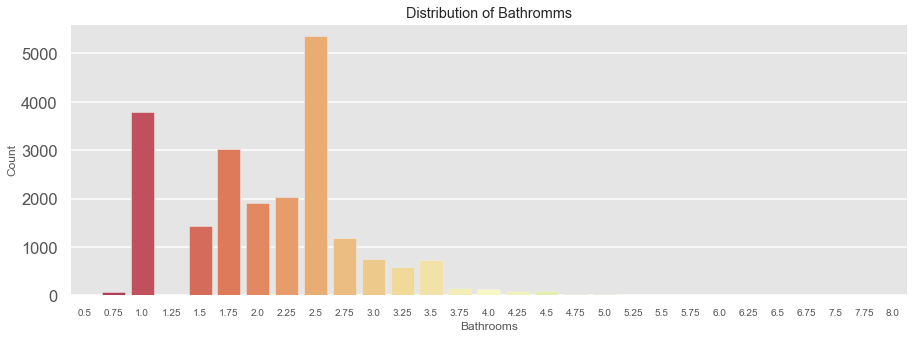

<Figure size 432x288 with 0 Axes>

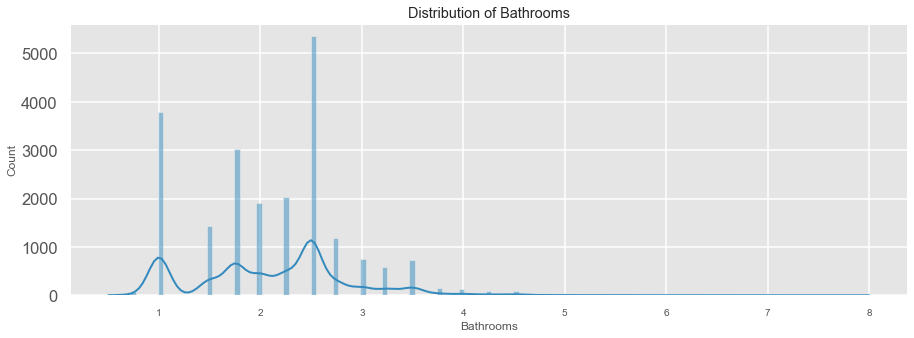

<Figure size 432x288 with 0 Axes>

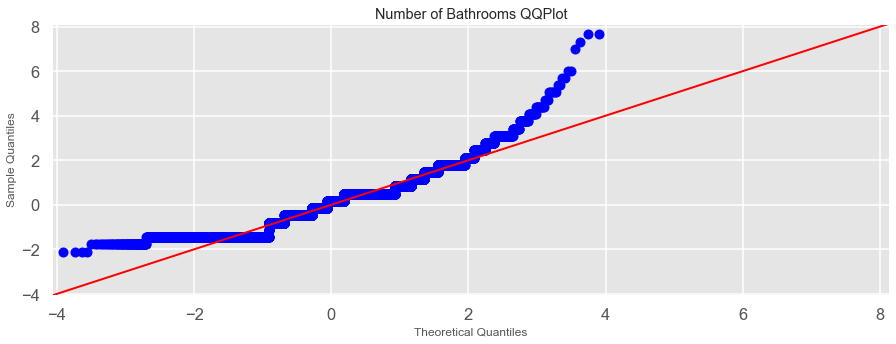

In [6640]:
#barplot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")
plt.title('Distribution of Bathromms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/bathrooms_distribution_barplot')

#histplot 'bedroom' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['bathrooms'], kde = True)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/bathrooms_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['bathrooms'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Number of Bathrooms QQPlot')
plt.savefig('./Data & Figures/bathrooms_qqplot')

Majority of home has 2.5 bathrooms.

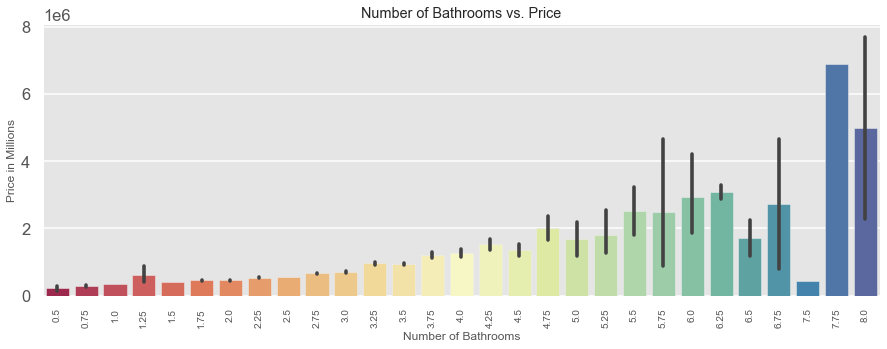

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

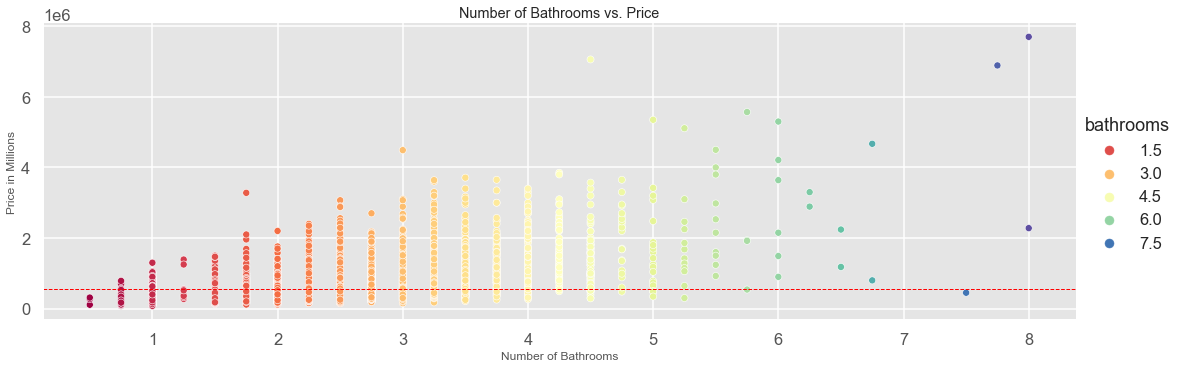

<Figure size 432x288 with 0 Axes>

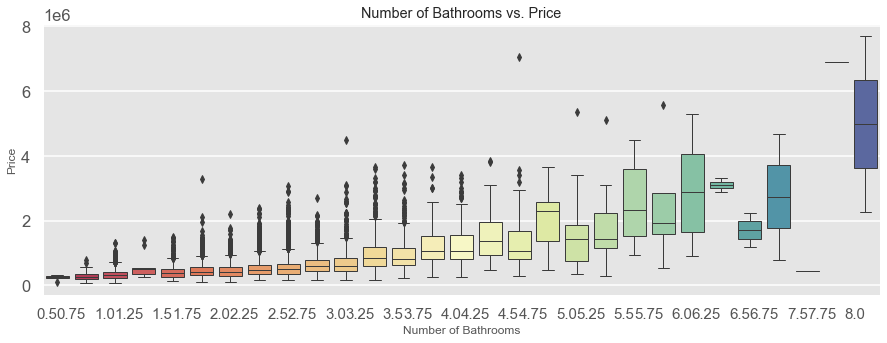

<Figure size 432x288 with 0 Axes>

In [6641]:
#barplot 'bathrooms' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['bathrooms'], kc_house['price'], 
            palette = "Spectral")
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/bathrooms_vs_price_barplot')

#relplot 'bathrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bathrooms',
            y = 'price',
            hue = 'bathrooms',
            data = kc_house,
            s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/bathrooms_no_outlier_vs_price_relplot')

#boxplot 'bathrooms' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['bathrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/bathrooms_no_outlier_vs_price_boxplot')

Higher number of bathrooms add value to the home. 
Majority of homes have 5 bathrooms or less. 
Houses with 5 or more bathrroms start to make a big difference.

In [6642]:
kc_house[['bathrooms', 'price']].corr()

bathrooms     price
bathrooms   1.000000  0.525859
price       0.525859  1.000000

### Grade: overall grade given to the housing unit, based on King County grading system: 'grade'

From grade 1 to 13:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [6643]:
kc_house['grade'].nunique()

11

In [6644]:
y_values = kc_house['grade'].value_counts(ascending = False)
x_values = y_values.index

y_values

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [6645]:
#get skewness
print('Skewness:', kc_house['grade'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['grade'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 0.7877401012501494
Kurtosis: 1.1335296765018352


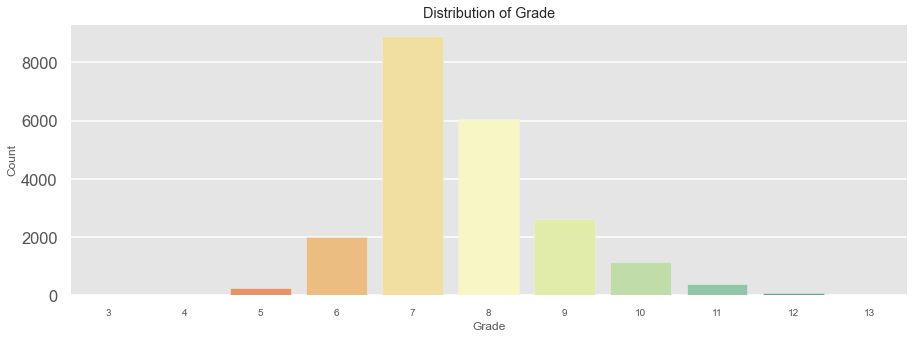

<Figure size 432x288 with 0 Axes>

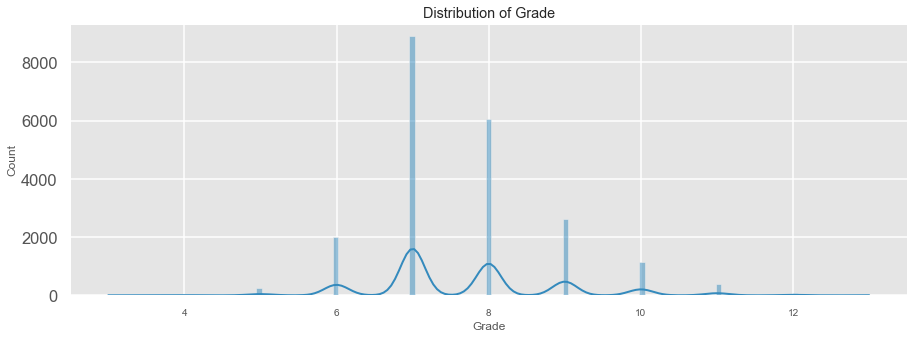

<Figure size 432x288 with 0 Axes>

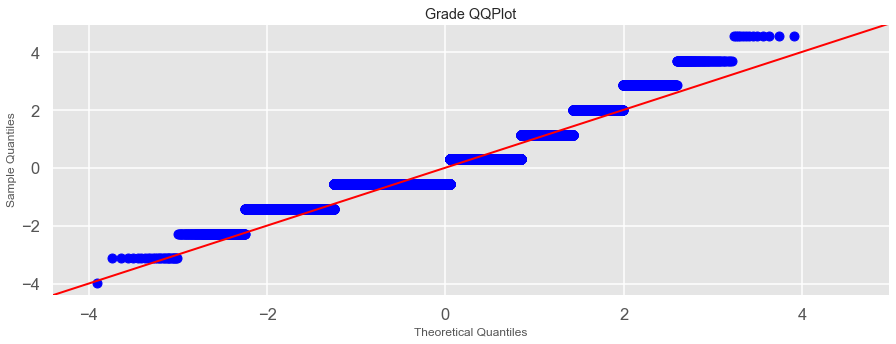

In [6646]:
#barplot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/grade_distribution_barplot')

#histplot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['grade'], kde = True)
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/grade_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['grade'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Grade QQPlot')
plt.savefig('./Data & Figures/grade_qqplot')

Most homes are graded 7 (average) and 8 (above average).

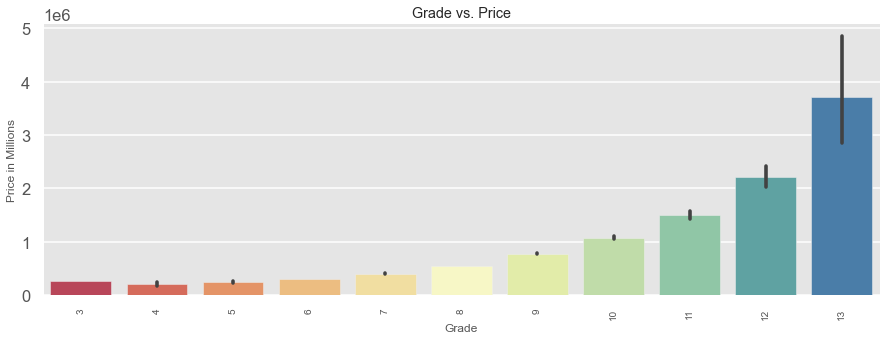

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

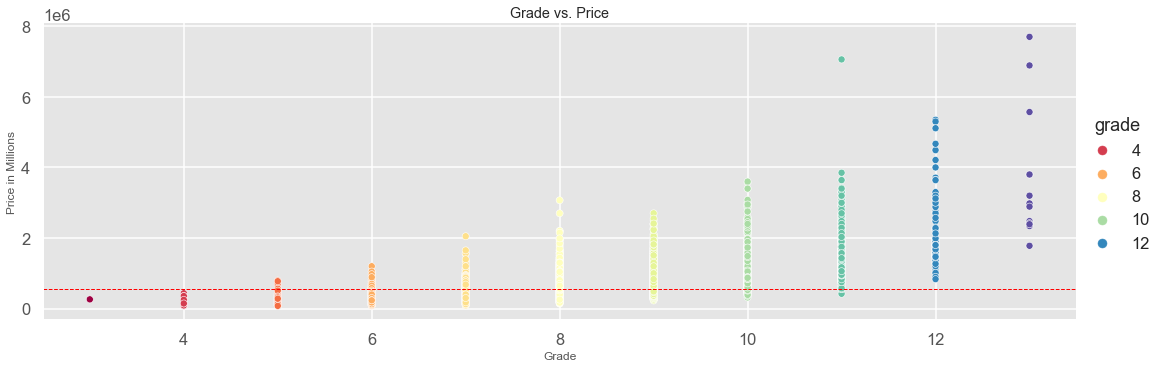

<Figure size 432x288 with 0 Axes>

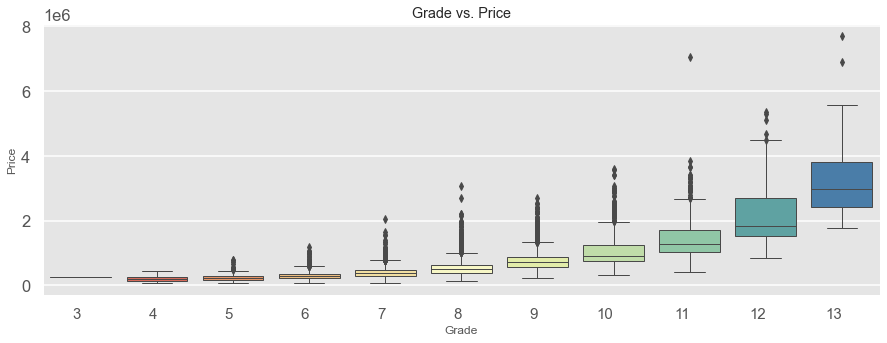

<Figure size 432x288 with 0 Axes>

In [6647]:
#barplot 'grade' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['grade'], kc_house['price'], 
            palette = "Spectral")
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/grade_vs_price_barplot')

#relplot 'grade' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'grade',
            data = kc_house,
            s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/grade_vs_price_relplot')

#boxplot 'grade' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['grade'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/grade_vs_price_boxplot')

We notice that the feature 'grade' plays a huge role in deciding the price of a house.
Grade of 6 (lowest grade currently meeting building code) and below has below or about the mean value.
Grade 7 (average grade of construction & design) and above is needed to pull the value of the home upward.
Grade 12 and above guarantees substantial value for the home.

In [6648]:
#get correlation
kc_house[['grade', 'price']].corr()

grade     price
grade  1.000000  0.667393
price  0.667393  1.000000

We observe that 'grade' has a linear correlation with price. Although it is a categorical data, we will not use OHE on it.

## Categorical variables

### Number of Floors: 'floors'

In [6649]:
kc_house['floors'].nunique()

6

In [6650]:
y_values = kc_house['floors'].value_counts(ascending=False)
x_values = y_values.index

y_values

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

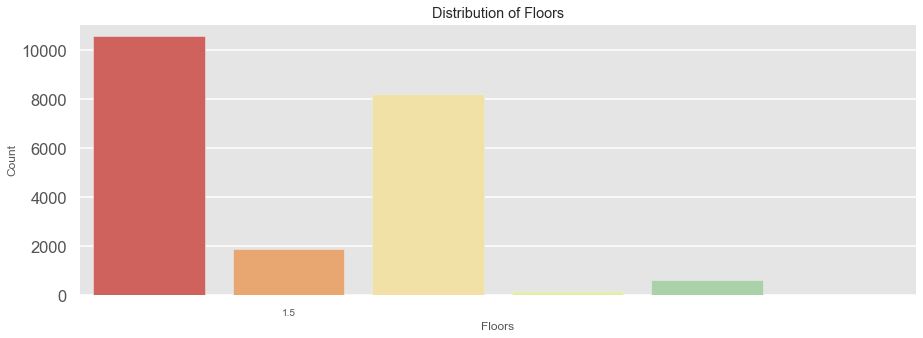

<Figure size 432x288 with 0 Axes>

In [6651]:
#barplot 'floors' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")
plt.title('Distribution of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.xticks(np.linspace(1.0, 4.0, 1), fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/floors_distribution_barplot')

Most houses have 1 - 2 floors.

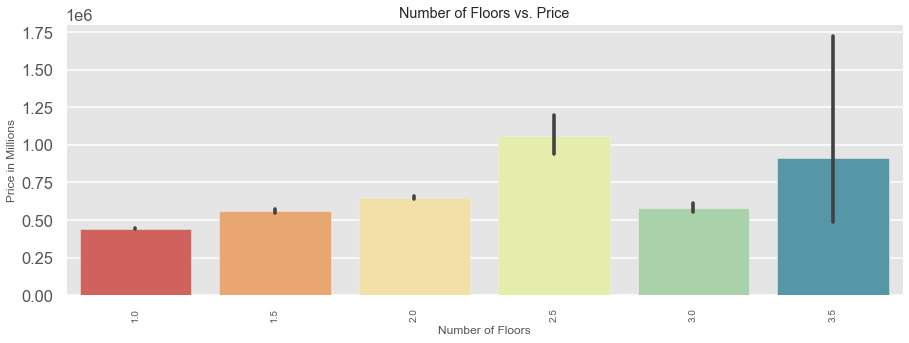

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

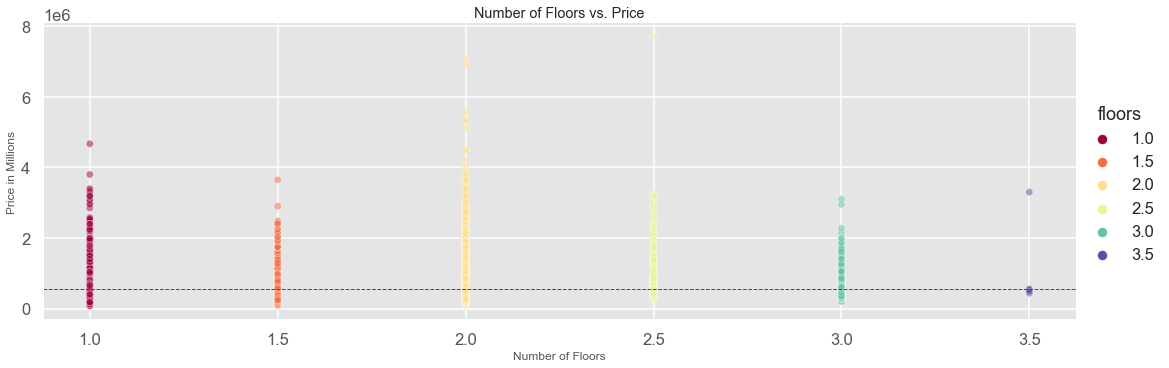

<Figure size 432x288 with 0 Axes>

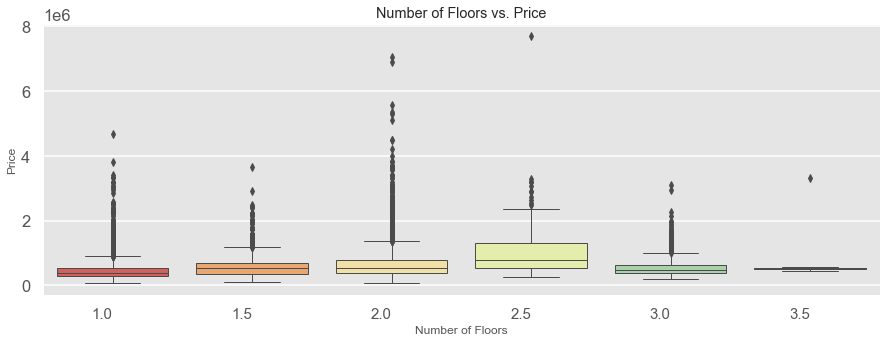

<Figure size 432x288 with 0 Axes>

In [6652]:
#barplot 'floors' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['floors'], kc_house['price'], 
            palette = "Spectral")
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/floors_vs_price_barplot')

#relplot 'floors' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'floors',
            y = 'price',
            hue = 'floors',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/floors_vs_price_relplot')

#boxplot 'floors' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['floors'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/floors_vs_price_boxplot')

Majority of homes have 1 floor. If they have an extra floor (2 - 2.5), price starts to increase but decrease if there are more than 2.5 floors.

In [6653]:
kc_house[['floors', 'price']].corr()

floors     price
floors  1.000000  0.255711
price   0.255711  1.000000

### Waterfront: 'waterfront'

In [6654]:
kc_house['waterfront'].nunique()

2

In [6655]:
y_values = kc_house['waterfront'].value_counts(ascending=False)
x_values = y_values.index

y_values

0.0    21274
1.0      146
Name: waterfront, dtype: int64

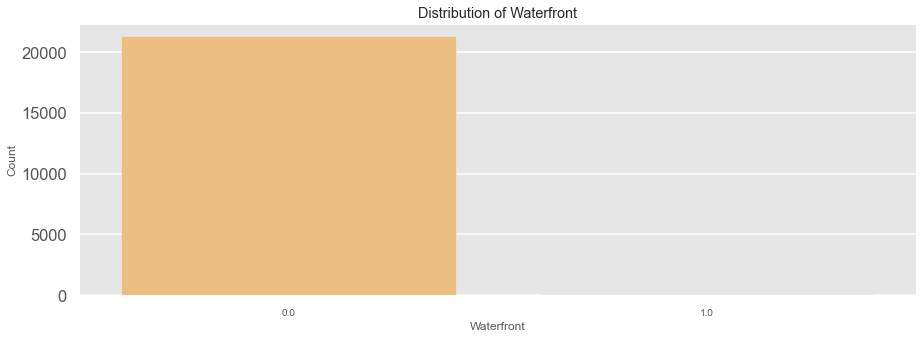

<Figure size 432x288 with 0 Axes>

In [6656]:
#barplot 'waterfront' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")
plt.title('Distribution of Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/waterfront_distribution_barplot')

Most houses has no water view.

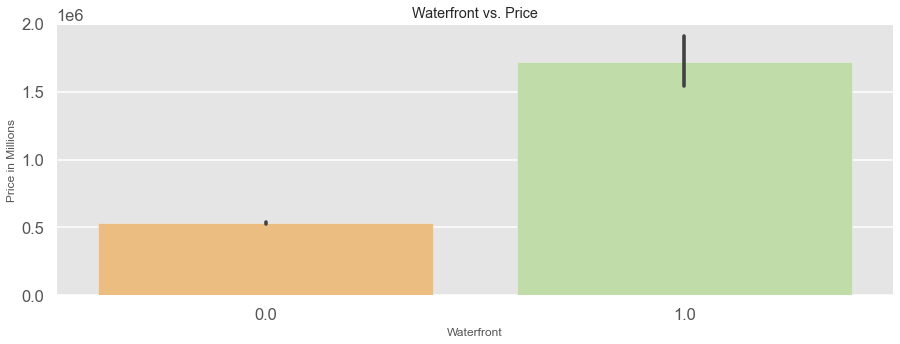

<Figure size 432x288 with 0 Axes>

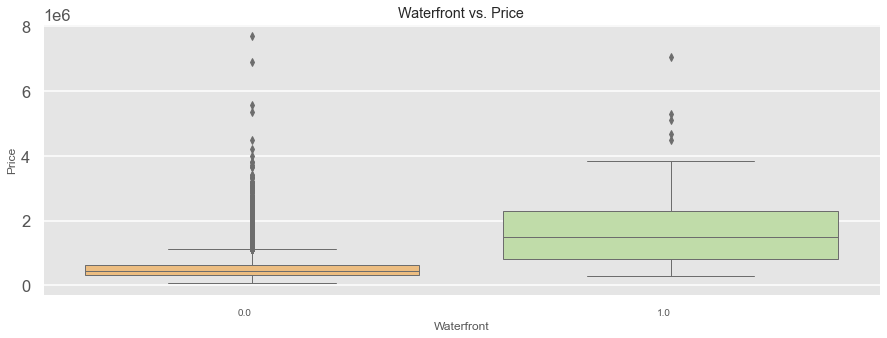

<Figure size 432x288 with 0 Axes>

In [6657]:
#barplot 'waterfront' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['waterfront'], kc_house['price'], 
            palette = "Spectral")
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/waterfront_vs_price_barplot')

#boxplot 'waterfront' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['waterfront'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.xticks(fontsize = 10, ha = 'right')
plt.show()
plt.savefig('./Data & Figures/waterfront_vs_price_boxplot')

Houses with a waterfront view are valued highly.

In [6658]:
kc_house[['waterfront', 'price']].corr()

waterfront    price
waterfront     1.00000  0.26493
price          0.26493  1.00000

### Condition: 'condition'

Relative to age and grade. Coded 1-5.

1 = Poor - Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair - Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average - Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good - No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5 = Very Good - All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [6659]:
kc_house['condition'].nunique()

5

In [6660]:
y_values = kc_house['condition'].value_counts(ascending = False)
x_values = y_values.index

y_values

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

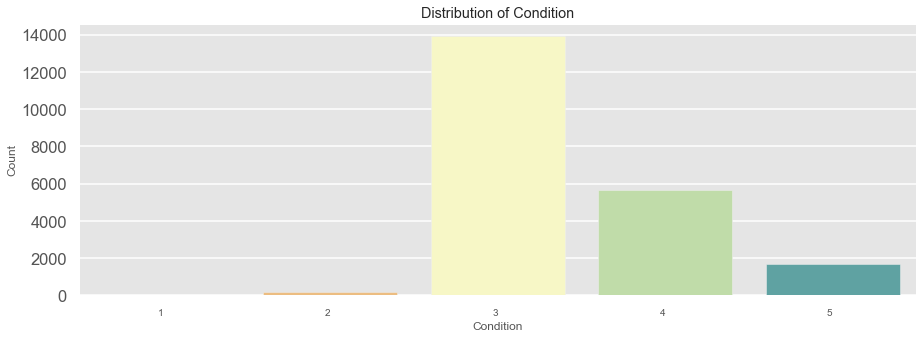

<Figure size 432x288 with 0 Axes>

In [6661]:
#barplot 'condition' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(fontsize = 10, ha = 'right')
plt.show()
plt.savefig('./Data & Figures/condition_distribution_barplot')

Majority of home is rated 3 in condition: Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. 

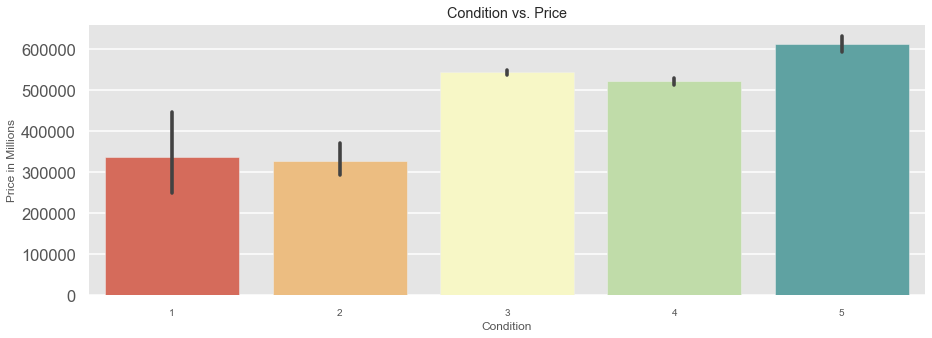

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

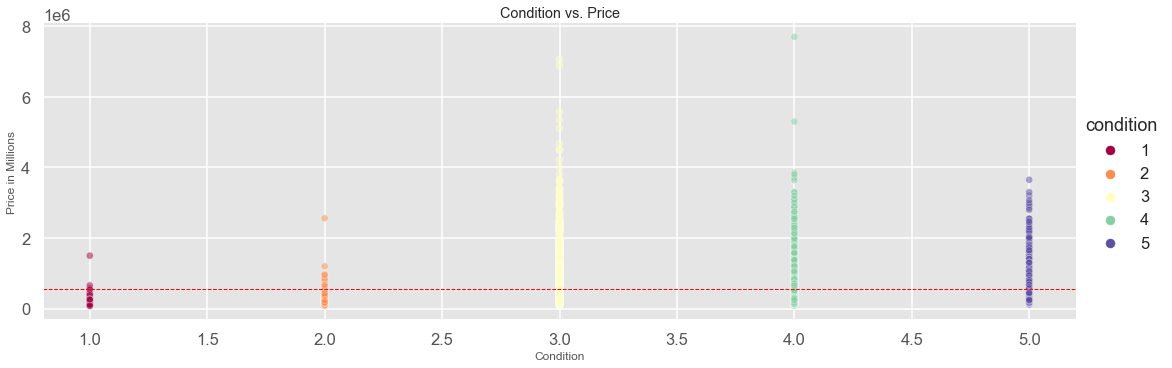

<Figure size 432x288 with 0 Axes>

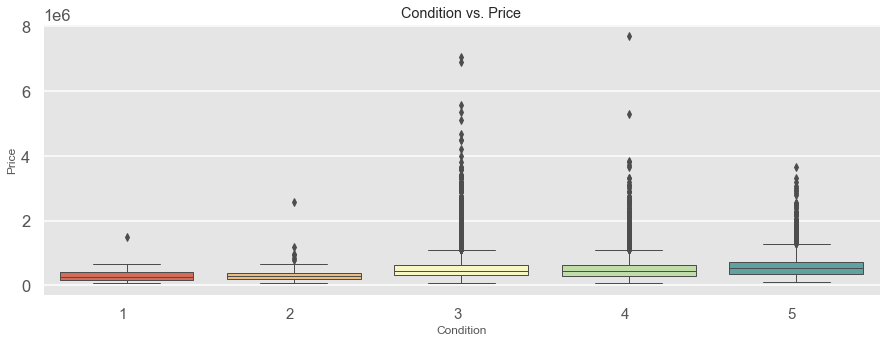

<Figure size 432x288 with 0 Axes>

In [6662]:
#barplot 'condition' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['condition'], kc_house['price'], 
            palette = "Spectral")
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/condition_vs_price_barplot')

#relplot 'condition' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'condition',
            y = 'price',
            hue = 'condition',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/condition_vs_price_relplot')

#boxplot 'condition' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['condition'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/condition_vs_price_boxplot')

We see that majority of the houses are in condition 3 (average) and they surprisingly perform equally well as those with condition 4 (good) and condition 5 (very good). This could be an interesting feature to include in our model since there are obviously other interactions in play.

In [6663]:
kc_house[['condition', 'price']].corr()

condition    price
condition    1.00000  0.03456
price        0.03456  1.00000

Weak correlation between 'condition' and 'price'.

## Time Data: ‘date’, ‘yr_built’, ‘yr_renovated’

### ‘date’, 'yr_built'

In [6664]:
#get summary statistics
kc_house['date'].describe()

count                   21420
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Dataset is from 2014 - 2015.

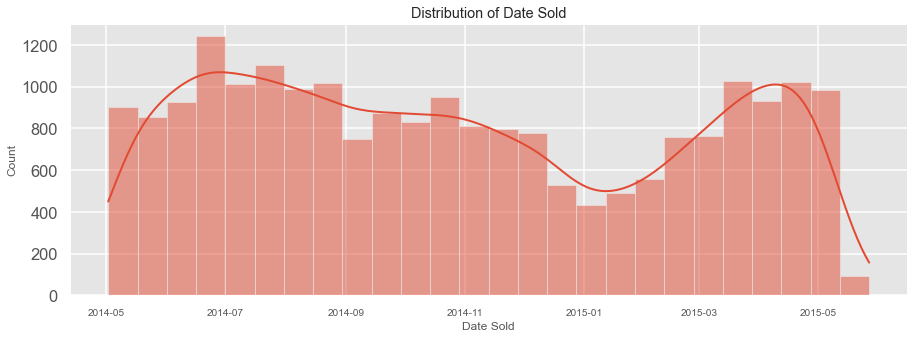

<Figure size 432x288 with 0 Axes>

In [6665]:
#histplot 'date' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['date'], kde = True)
plt.title('Distribution of Date Sold')
plt.xlabel('Date Sold')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/date_histtplot')

<Figure size 1080x360 with 0 Axes>

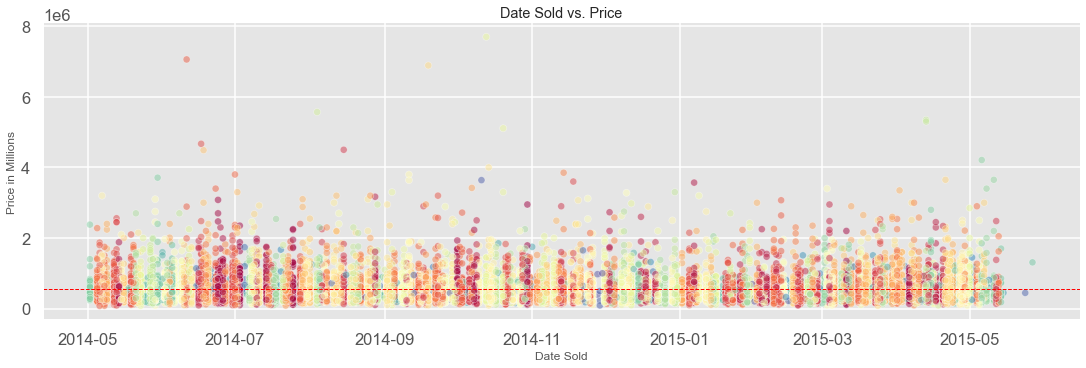

<Figure size 432x288 with 0 Axes>

In [6666]:
#plot 'date' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'date',
            y = 'price',
            hue = 'date',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral', legend = False)
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Date Sold vs. Price')
plt.xlabel('Date Sold')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/date_reltplot')

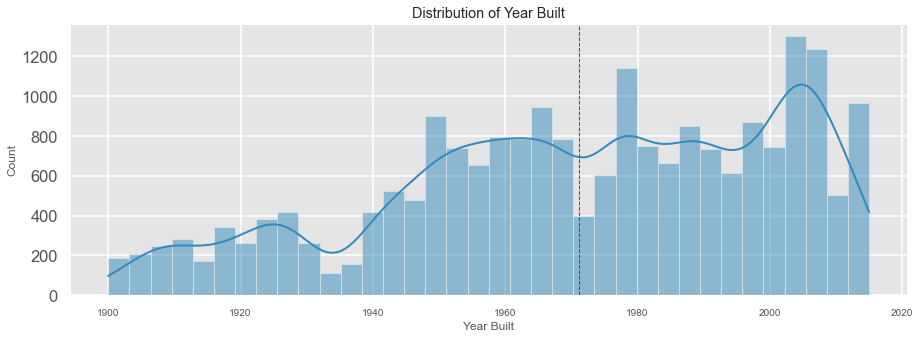

<Figure size 432x288 with 0 Axes>

In [6667]:
#plot 'yr_built' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['yr_built'], kde = True)
plt.axvline(kc_house['yr_built'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/yr_built_histplot')

In [6668]:
#average yr_built
kc_house['yr_built'].mean()

#Most houses are built after 1970.

1971.0929971988796

<Figure size 1080x360 with 0 Axes>

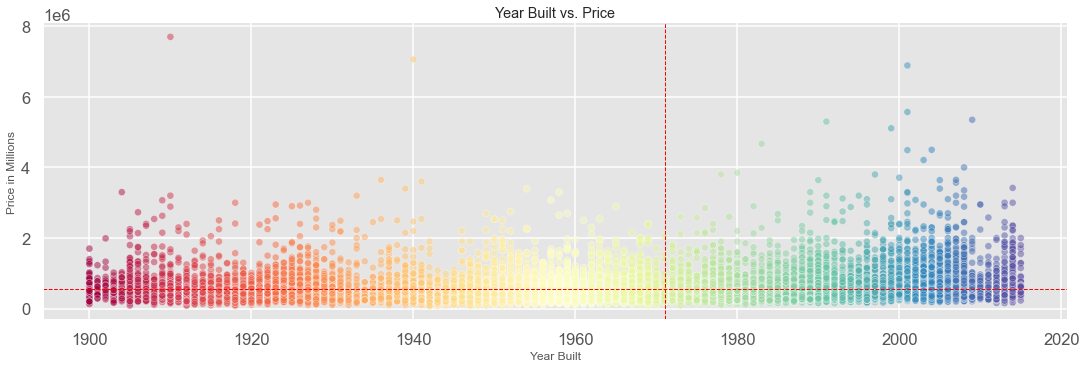

<Figure size 432x288 with 0 Axes>

In [6669]:
#plot 'yr_built' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'yr_built',
            y = 'price',
            hue = 'yr_built',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral', legend = False)
plt.axvline(kc_house['yr_built'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Year Built vs. Price')
plt.xlabel('Year Built')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/yr_built_vs_price_relplot')

Older built houses are lower in value than the newer built ones after 1970.

In [6670]:
#we see from above that the dataset most current year is 2015
#use 2015 to calculate the house age
kc_house['age'] = 2015 - kc_house['yr_built']
kc_house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   
7614  2014-06-24  339000.0         3       1.00         1100      4128   
3257  2015-03-11  380000.0         2       1.00         1040      7372   
16723 2014-07-25  365000.0         5       2.00         1600      4168   

       floors  waterfront  condition  grade  ...  sqft_living15  sqft_lot15  \
15937     1.0         0.0          3      6  ...           1000        8100   
20963     1.5         0.0          3      9  ...           1440        1188   
7614      1.0         0.0          4      7  ...           1510        4538   
3257      1.0         0.0          5      7  ...           1930        5150   
16723     1.5         0.0          3      7  ...           1190        4168   

       price_log  sqft_living_log  sqft_lot_log  sqft_above_log  basement  \
15937  12.502281         7.185387      8.999619        6.779922         1   
20963  12.898970         7.251345      6.912743        6.802395         1   
7614   12.733755         7.003065      8.325548        6.579251         1   
3257   12.847927         6.946976      8.905444        6.733402         1   
16723  12.807653         7.377759      8.335192        7.377759         0   

       sqft_living15_log  sqft_lot15_log  age  
15937           6.907755        8.999619   72  
20963           7.272398        7.080026    4  
7614            7.319865        8.420242   73  
3257            7.565275        8.546752   76  
16723           7.081709        8.335192   88  

[5 rows x 26 columns]

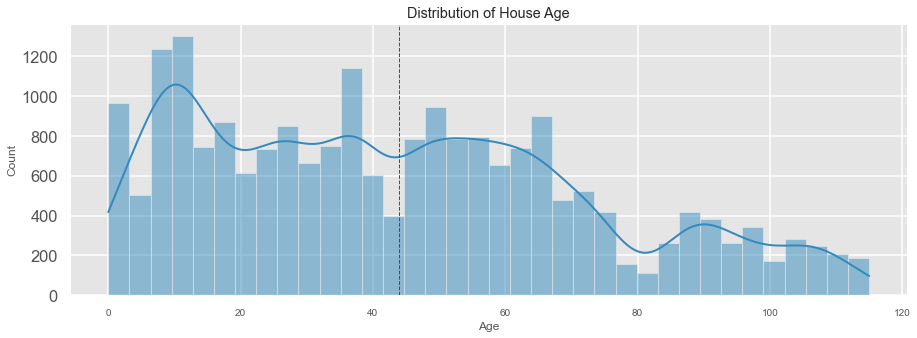

<Figure size 432x288 with 0 Axes>

In [6671]:
#plot 'age' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['age'], kde = True)
plt.axvline(kc_house['age'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Distribution of House Age')
plt.xlabel('Age')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/age_distribution_histplot')

In [6672]:
#average house age
kc_house['age'].mean() 

43.90700280112045

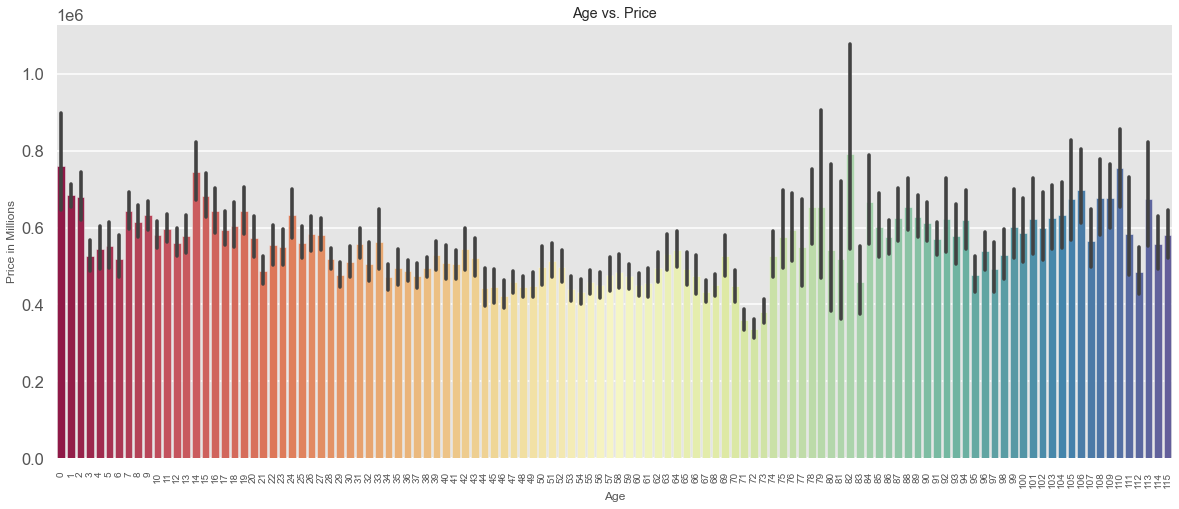

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

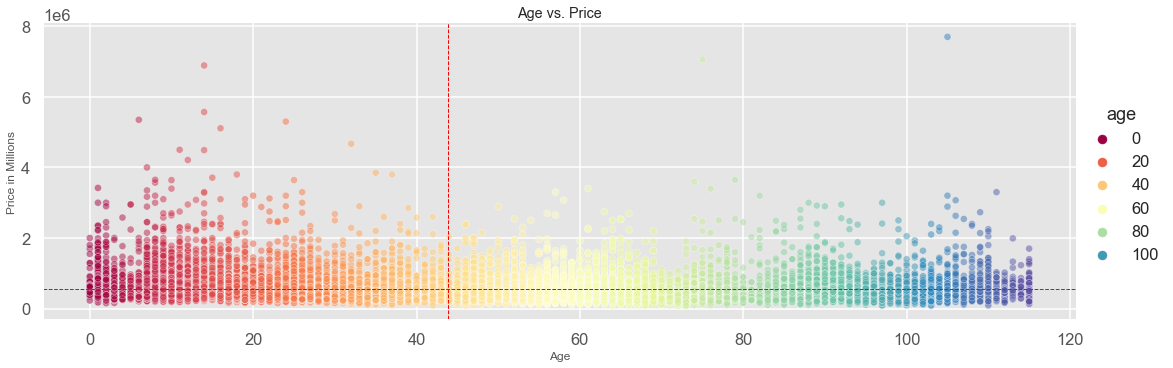

<Figure size 432x288 with 0 Axes>

In [6673]:
#barplot 'age' vs. 'price' distribution
plt.figure(figsize = (20, 8))
sns.barplot(kc_house['age'], kc_house['price'], 
            palette = "Spectral")
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/age_vs_price_barplot')

#relplot 'age' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'age',
            y = 'price',
            hue = 'age',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axvline(kc_house['age'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'Mean Price')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'Mean Price')
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/age_relplot')

In [6674]:
#get correlation
kc_house[['date', 'yr_built', 'age', 'price']].corr()

yr_built      age    price
yr_built   1.00000 -1.00000  0.05194
age       -1.00000  1.00000 -0.05194
price      0.05194 -0.05194  1.00000

There is negative correlation between 'age' and 'price': as 'age' increases, 'price' decreases.

We no longer need 'yr_built' and 'date' so we are dropping them fron the dataset.

In [6675]:
#drop
kc_house.drop(['yr_built', 'date'], axis = 1, inplace = True)

### 'yr_renovated'

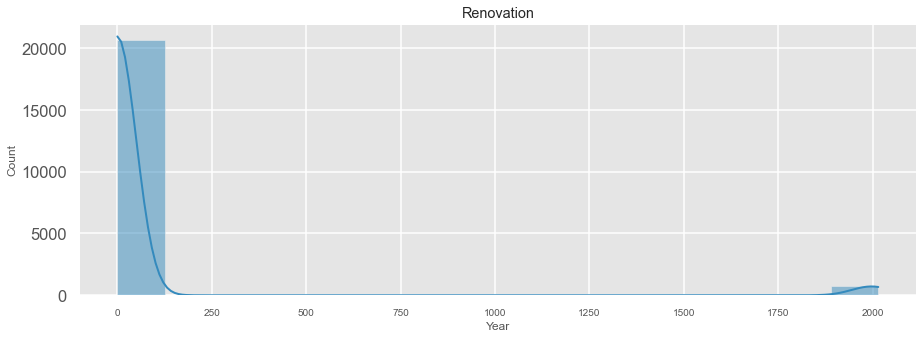

<Figure size 432x288 with 0 Axes>

In [6676]:
#plot 'yr_renovated' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['yr_renovated'], kde = True)
plt.title('Renovation')
plt.xlabel('Year')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/yr_renovated_distribution_histplot')

<Figure size 1080x360 with 0 Axes>

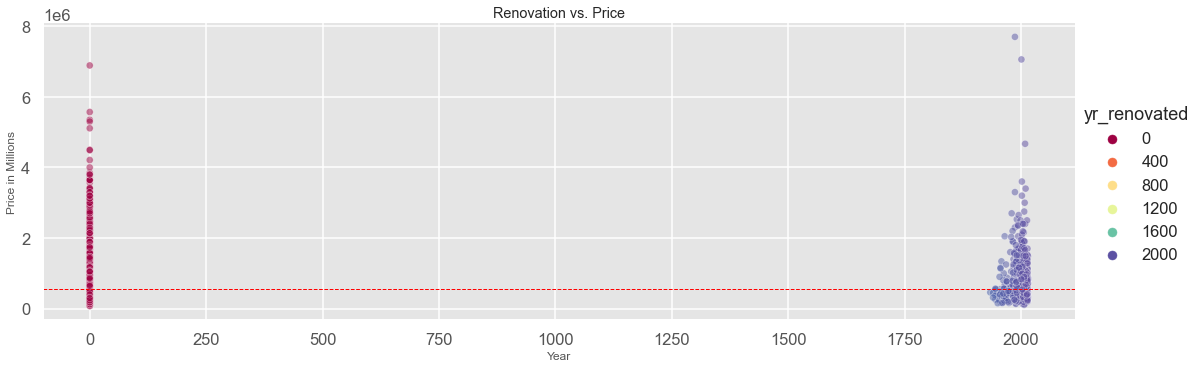

<Figure size 432x288 with 0 Axes>

In [6677]:
#plot 'yr_renovated' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'yr_renovated',
            y = 'price',
            hue = 'yr_renovated',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Renovation vs. Price')
plt.xlabel('Year')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/yr_renovated_vs_price_relplot')

We see that 'yr_renovated' is zero-inflated, meaning there are lots of houses that did not get renovated. We can classify 'yr_renovated' as dichotomous variable: yes renovation (1) and no renovation (0)

In [6678]:
#classify 'yr_renovated' as dichotomous variable
kc_house['renovation'] = kc_house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#drop 'yr_renovated'
kc_house.drop('yr_renovated', axis = 1, inplace = True)

#view
kc_house.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15937  268950.0         3       1.00         1320      8100     1.0   
20963  399900.0         2       1.75         1410      1005     1.5   

       waterfront  condition  grade  sqft_above  ...  sqft_lot15  price_log  \
15937         0.0          3      6         880  ...        8100  12.502281   
20963         0.0          3      9         900  ...        1188  12.898970   

       sqft_living_log  sqft_lot_log  sqft_above_log  basement  \
15937         7.185387      8.999619        6.779922         1   
20963         7.251345      6.912743        6.802395         1   

       sqft_living15_log  sqft_lot15_log  age  renovation  
15937           6.907755        8.999619   72           0  
20963           7.272398        7.080026    4           0  

[2 rows x 24 columns]

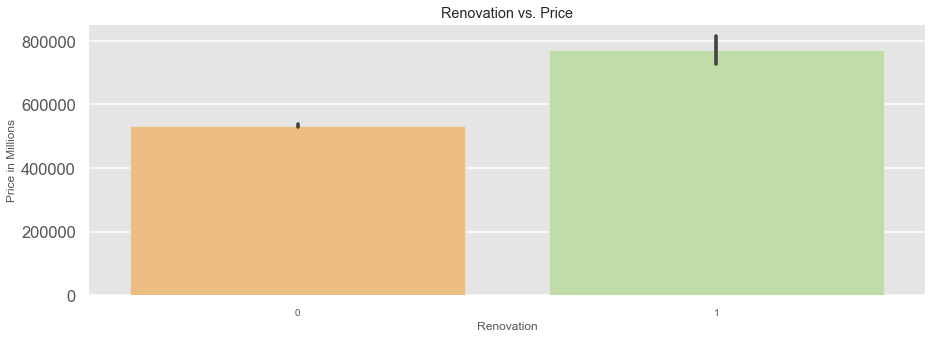

<Figure size 432x288 with 0 Axes>

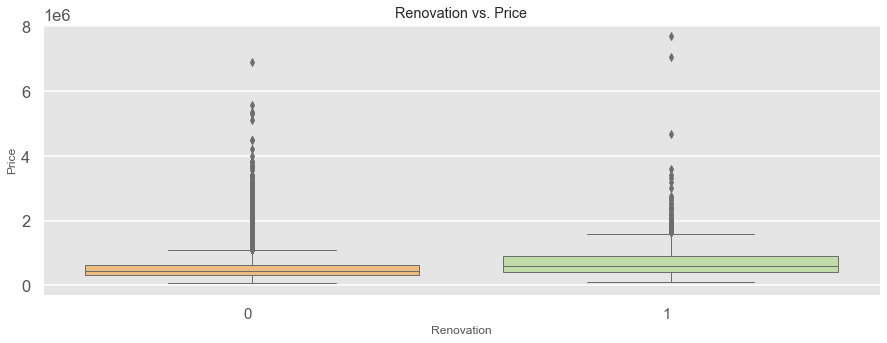

<Figure size 432x288 with 0 Axes>

In [6679]:
#barplot 'yr_renovated'  vs. 'price' distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['renovation'], kc_house['price'], 
            palette = "Spectral")
plt.title('Renovation vs. Price')
plt.xlabel('Renovation')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/renovation_vs_price_barplot')

#boxplot 'renovation' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['renovation'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')
plt.title('Renovation vs. Price')
plt.xlabel('Renovation')
plt.ylabel('Price')
plt.xticks(ha = 'right', fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/renovation_vs_price_boxplot')

Renovation adds value to the home but not that much. 

In [6680]:
#get correlation
kc_house[['renovation', 'price']].corr()

renovation     price
renovation    1.000000  0.118032
price         0.118032  1.000000

## Location Data: 'zipcode'

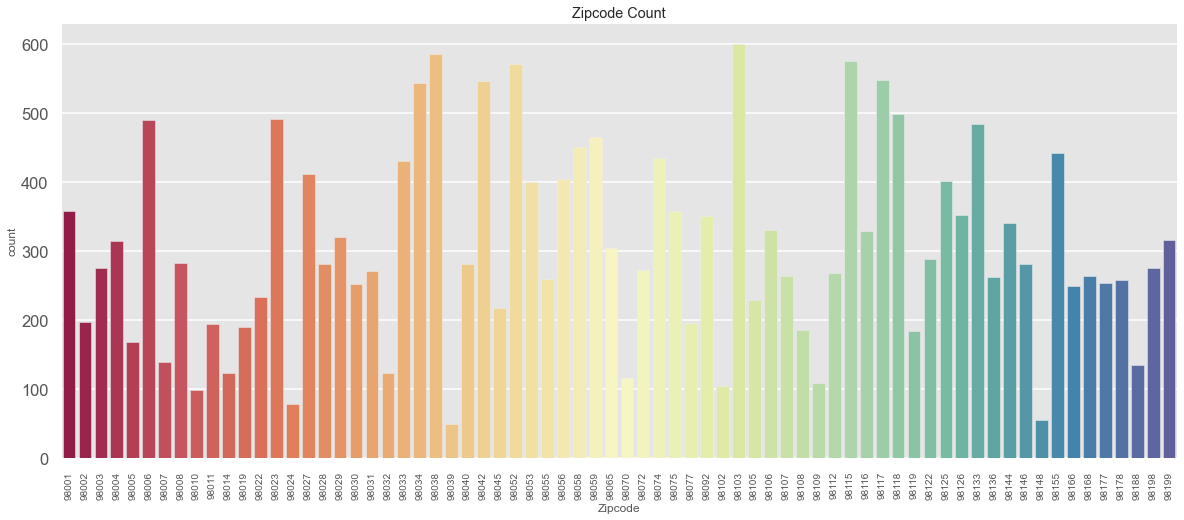

<Figure size 432x288 with 0 Axes>

In [6681]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.countplot(x ='zipcode', 
              data = kc_house, 
              palette = "Spectral")
plt.title('Zipcode Count')
plt.xlabel('Zipcode')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/zipcode_countplot')

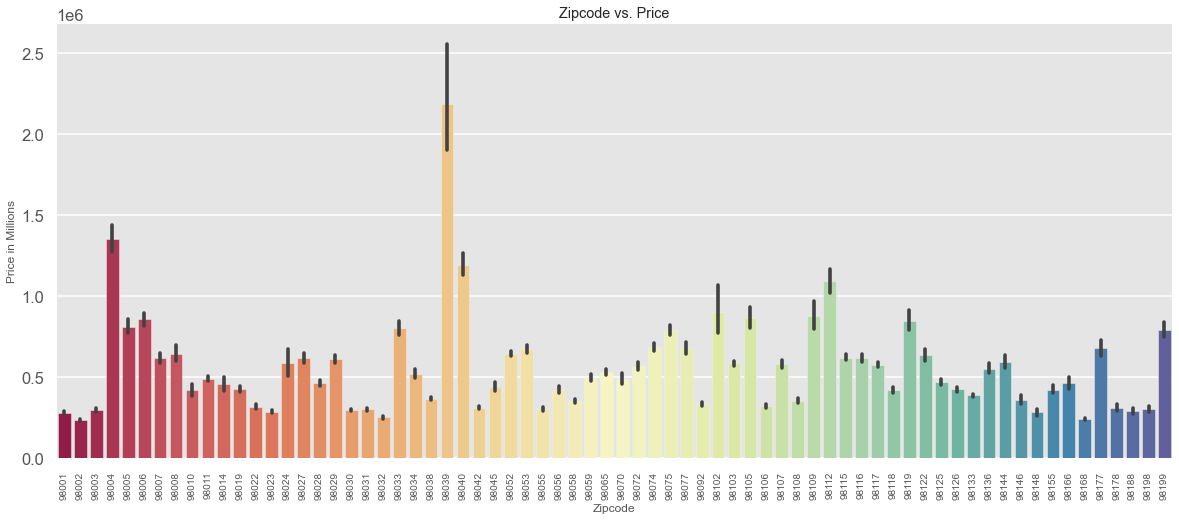

<Figure size 432x288 with 0 Axes>

In [6682]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.barplot(kc_house['zipcode'], kc_house['price'],
            palette = "Spectral")
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data & Figures/zipcode_vs_price_barplot')

We observe that zipcode 98004, 98039, 98040, 98112 are those with highest value. We can take a look at these zipcodes later.

<Figure size 1080x360 with 0 Axes>

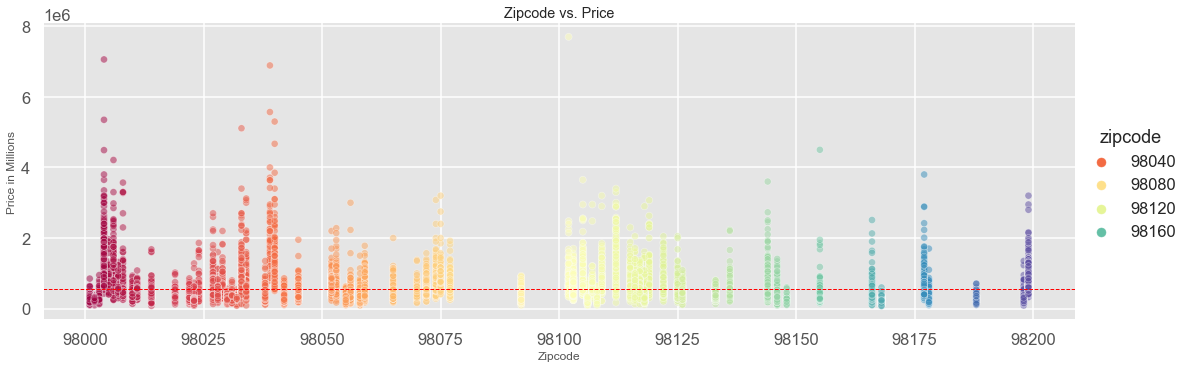

<Figure size 432x288 with 0 Axes>

In [6683]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'zipcode',
            y = 'price',
            hue = 'zipcode',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.show()
plt.savefig('./Data & Figures/zipcode_vs_price_relplot')

We see that properties that are 1.6M+ are clustered and increase in price as they go toward the center. We can section our maps into areas as such: Zipcode data is categoried (A-I) as per the zipcode map on the King County website: https://www.kingcounty.gov/services/gis/Maps/vmc/Boundaries.aspx

* A - Seattle, Shoreline, Lake Forest Park

* B - Kirkland, Kenmore, Bothell, Redmond, Woodinville

* C - Bellevue, Mercer Island, Newcastle

* D - Renton, Kent

* E - Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island

* F - Federal Way, Auburn, Algona, Milton, Pacific

* G - Sammamish, Issaquah, Carnation, Duvall

* H - Covington, Maple Valley, Black Diamond, Enumclaw

* I - Snoquaimie, North Bend


In [6684]:
#code adopted from https://github.com/calbal91/project-king-county-housing/blob/master/Analysis.ipynb

# Seattle, Shoreline, Lake Forest Park
Azips = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
Bzips = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
Czips = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
Dzips = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
Ezips = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
Fzips = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
Gzips = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
Hzips = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
Izips = [98065, 98045, 98024]

In [6685]:
def zipcode(x):
    
    '''Parameters:
           x (int): The property's zip code.
       Returns:
           zipcode group (str): The property's area group (a letter from A to I)
           Will return X if zip code not recognised.'''
    
    if x in Azips:
        return 'A'
    elif x in Bzips:
        return 'B'
    elif x in Czips:
        return 'C'
    elif x in Dzips:
        return 'D'
    elif x in Ezips:
        return 'E'
    elif x in Fzips:
        return 'F'
    elif x in Gzips:
        return 'G'
    elif x in Hzips:
        return 'H'
    elif x in Izips:
        return 'I'
    else:
        return 'X'

In [6686]:
#one hot encoding our zipcode
kc_house['zipcat'] = kc_house['zipcode'].map(zipcode)
zip_dummies = pd.get_dummies(kc_house["zipcat"], prefix="zip")

#merge with our dataframe
kc_house = pd.concat([kc_house, zip_dummies], axis=1)

#review
kc_house.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15937  268950.0         3       1.00         1320      8100     1.0   
20963  399900.0         2       1.75         1410      1005     1.5   
7614   339000.0         3       1.00         1100      4128     1.0   
3257   380000.0         2       1.00         1040      7372     1.0   
16723  365000.0         5       2.00         1600      4168     1.5   

       waterfront  condition  grade  sqft_above  ...  zipcat  zip_A  zip_B  \
15937         0.0          3      6         880  ...       E      0      0   
20963         0.0          3      9         900  ...       G      0      0   
7614          0.0          4      7         720  ...       A      1      0   
3257          0.0          5      7         840  ...       A      1      0   
16723         0.0          3      7        1600  ...       A      1      0   

       zip_C  zip_D  zip_E  zip_F  zip_G  zip_H  zip_I  
15937      0      0      1      0      0      0      0  
20963      0      0      0      0      1      0      0  
7614       0      0      0      0      0      0      0  
3257       0      0      0      0      0      0      0  
16723      0      0      0      0      0      0      0  

[5 rows x 34 columns]

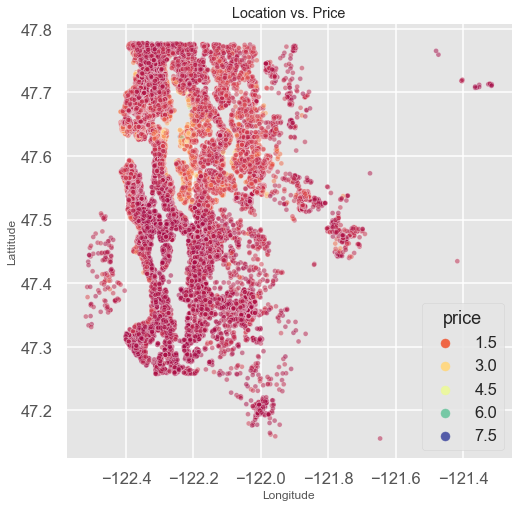

<Figure size 432x288 with 0 Axes>

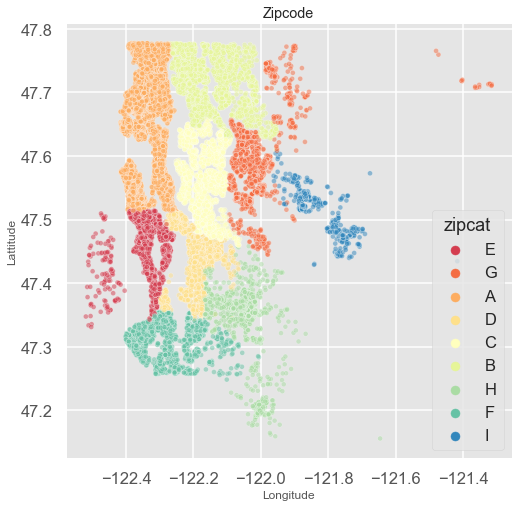

<Figure size 432x288 with 0 Axes>

In [6687]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'long',
                y = 'lat',
                hue = 'price',
                data = kc_house,
                alpha = 0.5, s = 25, palette = 'Spectral')
plt.title('Location vs. Price')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data & Figures/location_vs_price_scatterplot')

#plot 'zipcat' 
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'long',
                y = 'lat',
                hue = 'zipcat',
                data = kc_house,
                alpha = 0.5, s = 25, palette = 'Spectral')
plt.title('Zipcode')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data & Figures/zipcat_scatterplot')

Reminder: 
* A - Seattle, Shoreline, Lake Forest Park: 98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112, 98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,98116, 98102, 98103, 98119, 98134

* B - Kirkland, Kenmore, Bothell, Redmond, Woodinville: 98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028

* C - Bellevue, Mercer Island, Newcastle: 98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039

* D - Renton, Kent: 98057, 98055, 98058, 98032, 98031, 98030, 98178

* E - Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island: 98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188

* F - Federal Way, Auburn, Algona, Milton, Pacific: 98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092

* G - Sammamish, Issaquah, Carnation, Duvall: 98074, 98075, 98029, 98027, 98019, 98014

* H - Covington, Maple Valley, Black Diamond, Enumclaw: 98022, 98042, 98010, 98038, 98051

* I - Snoquaimie, North Bend: 98065, 98045, 98024

The yellow region of C which includes Bellevue, Mercer Island, Newcastle is the region with the highest values. 

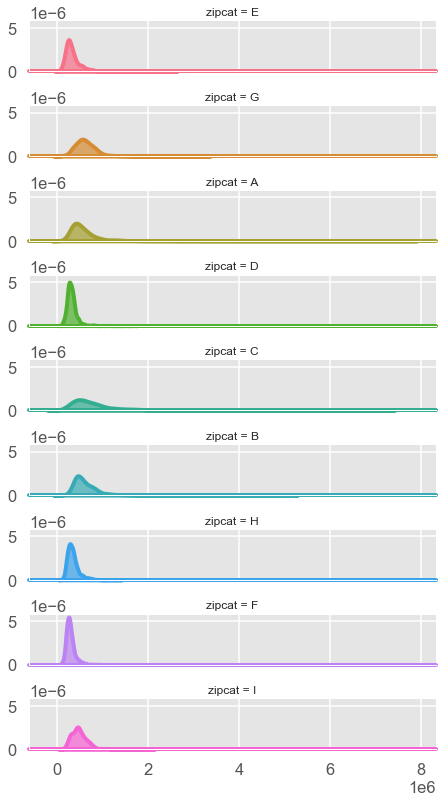

In [6688]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(kc_house, row='zipcat', hue='zipcat', aspect=5, height=1.25)

# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, 'price', clip_on=False, shade=True, alpha=0.7, lw=4, bw=0.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

## Check for Multicollinearity

In [6689]:
#get correlation of all features
kc_house.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price              1.000000  0.316933   0.525859     0.701651  0.088936   
bedrooms           0.316933  1.000000   0.528917     0.594221  0.033638   
bathrooms          0.525859  0.528917   1.000000     0.755522  0.087779   
sqft_living        0.701651  0.594221   0.755522     1.000000  0.172586   
sqft_lot           0.088936  0.033638   0.087779     0.172586  1.000000   
floors             0.255711  0.183570   0.501803     0.352868 -0.005561   
waterfront         0.264930 -0.002132   0.063635     0.104737  0.021429   
condition          0.034560  0.022743  -0.129362    -0.061677 -0.009169   
grade              0.667393  0.367750   0.665587     0.762477  0.113656   
sqft_above         0.604916  0.493566   0.686328     0.876533  0.183210   
zipcode           -0.051808 -0.159637  -0.203884    -0.198995 -0.129422   
lat                0.306024 -0.012974   0.023143     0.050739 -0.085822   
long               0.020368  0.137018   0.223808     0.240212  0.230265   
sqft_living15      0.584227  0.406240   0.569453     0.756186  0.143805   
sqft_lot15         0.082247  0.031787   0.087760     0.183837  0.717743   
price_log          0.892135  0.352140   0.551106     0.695416  0.099381   
sqft_living_log    0.611413  0.638493   0.761854     0.954597  0.149521   
sqft_lot_log       0.161567  0.190840   0.100781     0.345084  0.638385   
sqft_above_log     0.542012  0.531289   0.695401     0.843128  0.162940   
basement           0.179724  0.163512   0.162598     0.203382 -0.035506   
sqft_living15_log  0.542896  0.420119   0.571280     0.732153  0.144383   
sqft_lot15_log     0.148035  0.167881   0.092188     0.321533  0.549838   
age               -0.051940 -0.160365  -0.506252    -0.316646 -0.052312   
renovation         0.118032  0.017924   0.047259     0.050623  0.005105   
zip_A              0.074664 -0.172867  -0.174570    -0.213826 -0.165563   
zip_B              0.081904  0.052022   0.091850     0.107355  0.037181   
zip_C              0.269217  0.164190   0.129437     0.199284 -0.019073   
zip_D             -0.176499  0.016241  -0.040502    -0.055747 -0.014041   
zip_E             -0.138402 -0.061133  -0.130146    -0.096614  0.018758   
zip_F             -0.197907  0.013359  -0.021269    -0.037166  0.004254   
zip_G              0.079001  0.059755   0.154037     0.153369  0.085282   
zip_H             -0.146567 -0.000084   0.023916    -0.013665  0.114785   
zip_I             -0.016610  0.007109   0.051246     0.053054  0.104597   

                     floors  waterfront  condition     grade  sqft_above  ...  \
price              0.255711    0.264930   0.034560  0.667393    0.604916  ...   
bedrooms           0.183570   -0.002132   0.022743  0.367750    0.493566  ...   
bathrooms          0.501803    0.063635  -0.129362  0.665587    0.686328  ...   
sqft_living        0.352868    0.104737  -0.061677  0.762477    0.876533  ...   
sqft_lot          -0.005561    0.021429  -0.009169  0.113656    0.183210  ...   
floors             1.000000    0.020578  -0.266859  0.458091    0.522751  ...   
waterfront         0.020578    1.000000   0.016608  0.082905    0.071737  ...   
condition         -0.266859    0.016608   1.000000 -0.150508   -0.161483  ...   
grade              0.458091    0.082905  -0.150508  1.000000    0.756221  ...   
sqft_above         0.522751    0.071737  -0.161483  0.756221    1.000000  ...   
zipcode           -0.058532    0.029183   0.004372 -0.183588   -0.260803  ...   
lat                0.048900   -0.012267  -0.015566  0.112815   -0.002040  ...   
long               0.124812   -0.037883  -0.107154  0.198555    0.344161  ...   
sqft_living15      0.279071    0.083921  -0.095256  0.713178    0.731887  ...   
sqft_lot15        -0.011367    0.030653  -0.003450  0.120056    0.194445  ...   
price_log          0.309430    0.171544   0.036822  0.703407    0.601692  ...   
sqft_living_log    0.366403    0.078975  -0.052323  0.742696    0.832511  ...   
sqft_lot_log 

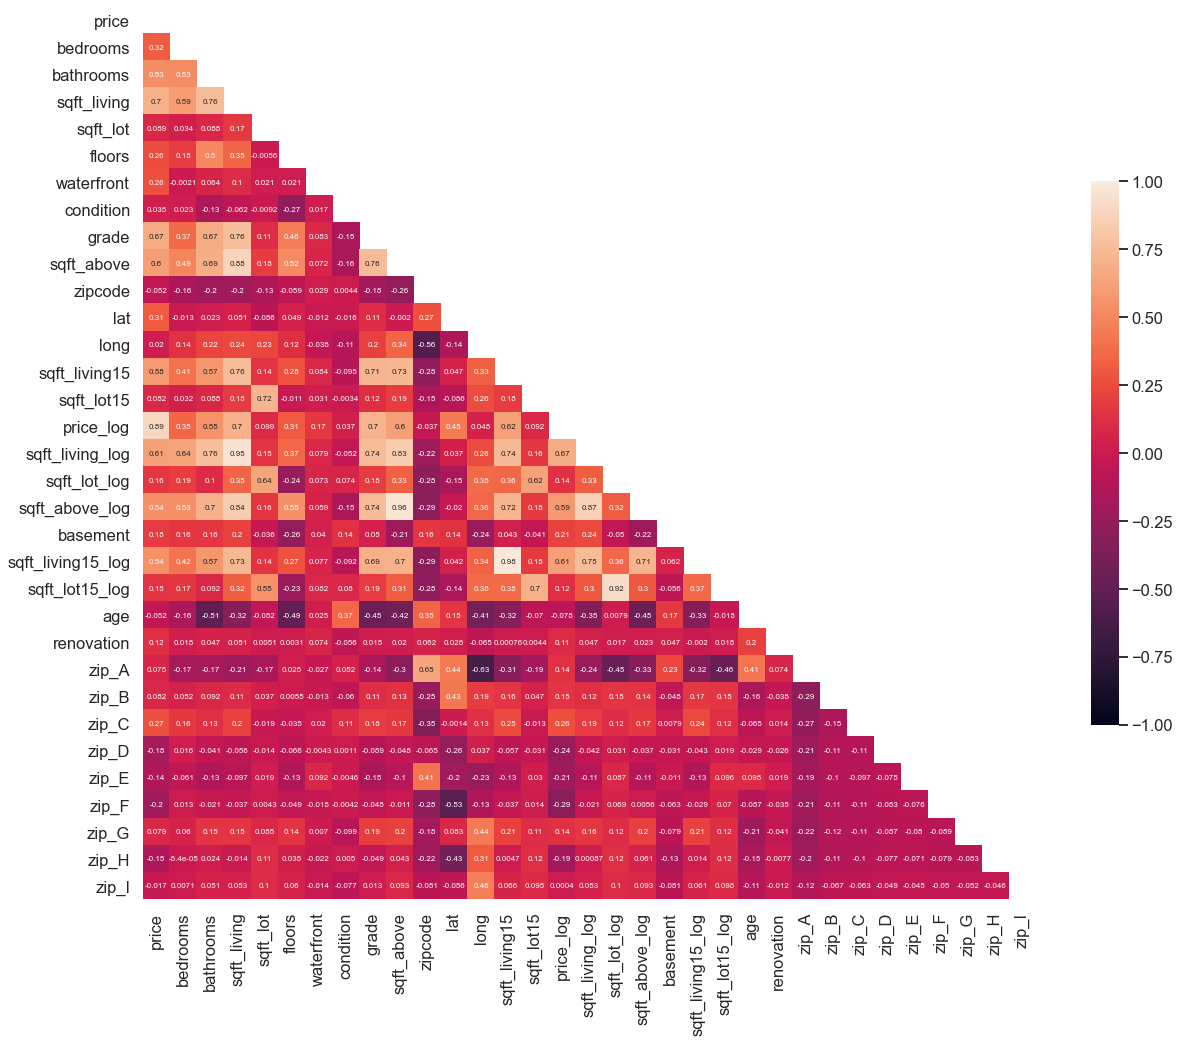

In [6690]:
#heatmap for all the required features
mask = np.zeros_like(kc_house.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(kc_house.corr(), 
                     annot = True,
                     annot_kws={"size": 8},
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)
    
#save
plt.savefig('./Data & Figures/heatmap')

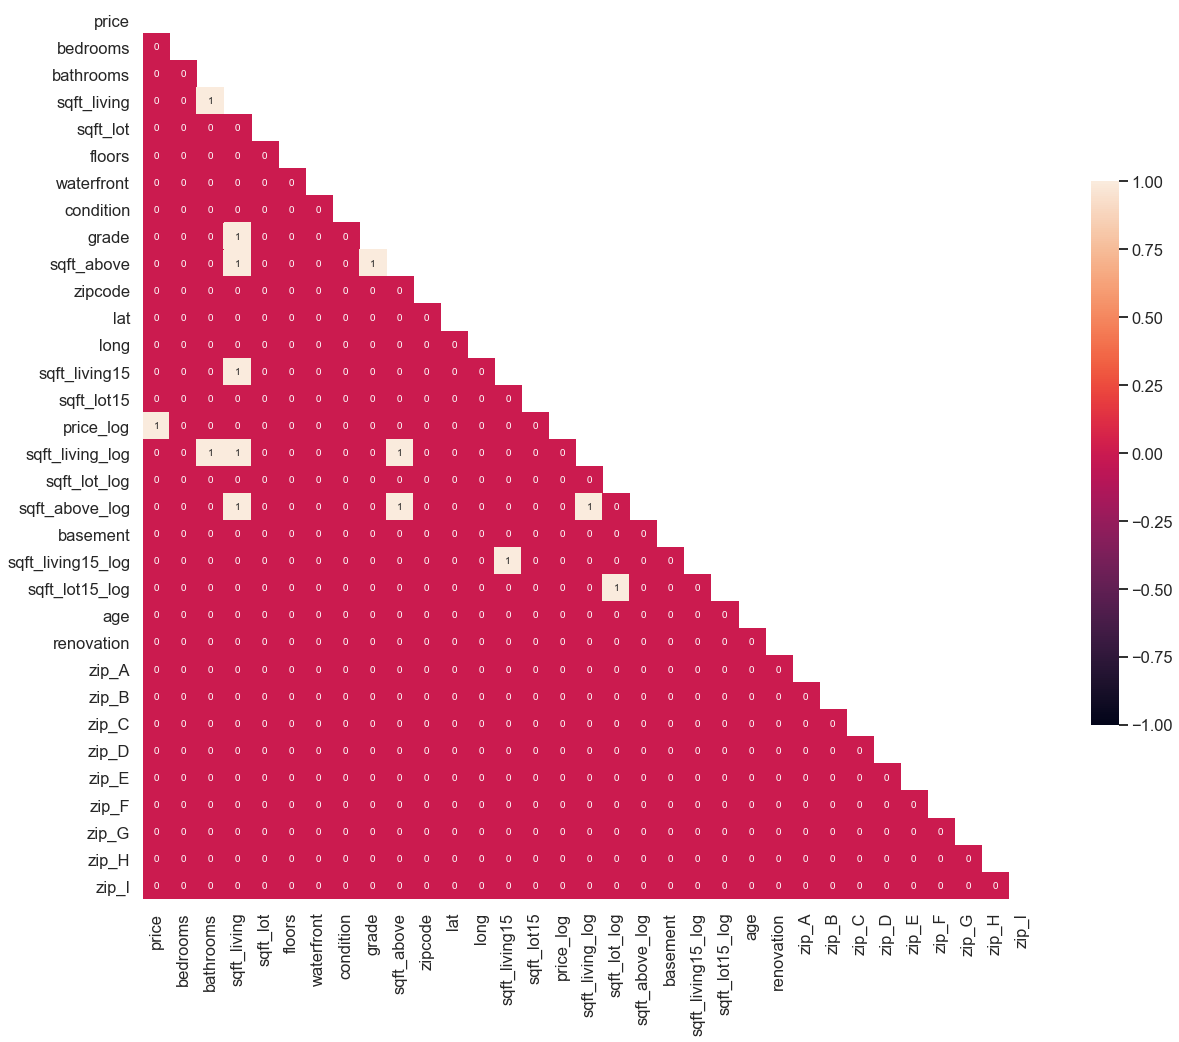

In [6691]:
#check for multicollinearity
mask = np.zeros_like(abs(kc_house.corr()) > 0.75)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(abs(kc_house.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

#save
plt.savefig('./Data & Figures/multicollinearity_heatmap')

**Observation:** We see multicollinearity between: 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'

We will examine which of these features are to keep and which are to drop to avoid multicollinearity

In [6692]:
#create a more robust solution that will return the variable pairs from the correlation matrix 
#that have correlations over .75, but less than 1 (learn.co)
kc_house_corr = kc_house.corr().abs().stack().reset_index().sort_values(0, ascending = False)
kc_house_corr.head()

level_0       level_1    0
0           price         price  1.0
578  sqft_lot_log  sqft_lot_log  1.0
102   sqft_living   sqft_living  1.0
136      sqft_lot      sqft_lot  1.0
170        floors        floors  1.0

In [6693]:
kc_house_corr['pairs'] = list(zip(kc_house_corr['level_0'], kc_house_corr['level_1']))
kc_house_corr.head()

level_0       level_1    0                         pairs
0           price         price  1.0                (price, price)
578  sqft_lot_log  sqft_lot_log  1.0  (sqft_lot_log, sqft_lot_log)
102   sqft_living   sqft_living  1.0    (sqft_living, sqft_living)
136      sqft_lot      sqft_lot  1.0          (sqft_lot, sqft_lot)
170        floors        floors  1.0              (floors, floors)

In [6694]:
kc_house_corr.set_index(['pairs'], inplace = True)
kc_house_corr.head()

level_0       level_1    0
pairs                                                        
(price, price)                       price         price  1.0
(sqft_lot_log, sqft_lot_log)  sqft_lot_log  sqft_lot_log  1.0
(sqft_living, sqft_living)     sqft_living   sqft_living  1.0
(sqft_lot, sqft_lot)              sqft_lot      sqft_lot  1.0
(floors, floors)                    floors        floors  1.0

In [6695]:
kc_house_corr.drop(columns = ['level_0', 'level_1'], inplace = True)
kc_house_corr.head()

0
pairs                            
(price, price)                1.0
(sqft_lot_log, sqft_lot_log)  1.0
(sqft_living, sqft_living)    1.0
(sqft_lot, sqft_lot)          1.0
(floors, floors)              1.0

In [6696]:
#add correlation column
kc_house_corr.columns = ['cc']
kc_house_corr.head()

cc
pairs                            
(price, price)                1.0
(sqft_lot_log, sqft_lot_log)  1.0
(sqft_living, sqft_living)    1.0
(sqft_lot, sqft_lot)          1.0
(floors, floors)              1.0

In [6697]:
kc_house_corr.drop_duplicates(inplace = True)

In [6698]:
#correlations over .75, but less than 1. = multicollinarity
kc_house_corr[(kc_house_corr['cc'] > 0.75) & (kc_house_corr['cc'] < 1)]
kc_house_corr.head(20)

cc
pairs                                         
(price, price)                        1.000000
(sqft_living15_log, sqft_living15)    0.976833
(sqft_above_log, sqft_above)          0.962524
(sqft_living_log, sqft_living)        0.954597
(sqft_lot_log, sqft_lot15_log)        0.918609
(price, price_log)                    0.892135
(sqft_above, sqft_living)             0.876533
(sqft_living_log, sqft_above_log)     0.865062
(sqft_living, sqft_above_log)         0.843128
(sqft_living_log, sqft_above)         0.832511
(sqft_living, grade)                  0.762477
(sqft_living_log, bathrooms)          0.761854
(sqft_above, grade)                   0.756221
(sqft_living15, sqft_living)          0.756186
(bathrooms, sqft_living)              0.755522
(sqft_living_log, sqft_living15_log)  0.747160
(grade, sqft_above_log)               0.742879
(sqft_living_log, grade)              0.742696
(sqft_living15, sqft_living_log)      0.737329
(sqft_living, sqft_living15_log)      0.732153

In [6699]:
#compare features' correlation with 'price'
kc_house[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade', 'price']].corr()

sqft_living  sqft_above  sqft_living15  bathrooms     grade  \
sqft_living       1.000000    0.876533       0.756186   0.755522  0.762477   
sqft_above        0.876533    1.000000       0.731887   0.686328  0.756221   
sqft_living15     0.756186    0.731887       1.000000   0.569453  0.713178   
bathrooms         0.755522    0.686328       0.569453   1.000000  0.665587   
grade             0.762477    0.756221       0.713178   0.665587  1.000000   
price             0.701651    0.604916       0.584227   0.525859  0.667393   

                  price  
sqft_living    0.701651  
sqft_above     0.604916  
sqft_living15  0.584227  
bathrooms      0.525859  
grade          0.667393  
price          1.000000

We see that that there are many pairs of highly correlated features and the correct approach is to drop one variable from each pair.

Deal with non log transformed set:

* (sqft_living, sqft_above)	= 0.876533
* (sqft_living, grade) =	0.762477
* (grade, sqft_above) =	0.756221
* (sqft_living, sqft_living15) = 0.756186
* (sqft_living, bathrooms) = 0.755522

'sqft_living' seems to be the one to be dropped since it appears in all pairs.

'grade' (0.667393) are more highly correlated with 'price' than 'sqft_above' (0.604916) but since we dropped 'sqft_living', we should at least keep 'sqft_above' as it is an informative feature about the house livable space. We will drop 'grade' instead.

Deal with log transformed set:

* (sqft_lot_log, sqft_lot15_log) = 0.918609
* (sqft_living_log, sqft_above_log)	0.865062 
* (sqft_living_log, bathrooms) = 0.761854

Drop 'sqft_lot15_log' since we want to focus on the property instead of the neighbor.

Drop 'sqft_living_log' since it is the common highly correlated feature.

In [6700]:
#drop features to prevent multicollinarity
kc_house.drop(['sqft_living', 'grade'], axis = 1, inplace = True)

In [6701]:
#drop their associated log transform to prevent multicollinarity
kc_house.drop(['sqft_living_log', 'sqft_lot15_log'], axis = 1, inplace = True)

## Summary

*  id:              dropped
*  date:            dropped
*  price:           target variable
*  sqft_living:     dropped: multicollinarity  
*  sqft_living_log: dropped: multicollinarity
*  sqft_above:      dropped: multicollinarity  
*  sqft_above_log:  dropped: multicollinarity
*  sqft_basement:   dropped: zero-flated
*  basement:        dichotomous OHE
*  sqft_lot:        continuous 
*  sqft_lot_log:    continuous 
*  sqft_living15:   
*  sqft_living15_log: 
*  sqft_lot15:   
*  sqft_lot15_log: 
*  yr_built:        dropped 
*  age:             continuous
*  yr_renovated:    dropped: zero-flated 
*  renovation:      dichotomous OHE
*  bedrooms:        ordinal 
*  bathrooms:       ordinal
*  floors:          OHE 
*  waterfront:      OHE
*  view:            dropped
*  condition:       OHE
*  grade:           ordinal
*  zipcode:        
*  zipcat:
*  lat:            
*  long:             
           

In [6724]:
kc_continuous = kc_house[['price', 'price_log', 'sqft_above', 'sqft_above_log', 'sqft_lot', 'sqft_lot_log', 'sqft_living15', 'sqft_living15_log', 'sqft_lot15', 'age']]

kc_ordinals = kc_house[['bedrooms', 'bathrooms', 'floors']]

kc_categoricals = kc_house[['waterfront', 'basement', 'renovation']]

In [6725]:
kc_continuous.head()

price  price_log  sqft_above  sqft_above_log  sqft_lot  \
15937  268950.0  12.502281         880        6.779922      8100   
20963  399900.0  12.898970         900        6.802395      1005   
7614   339000.0  12.733755         720        6.579251      4128   
3257   380000.0  12.847927         840        6.733402      7372   
16723  365000.0  12.807653        1600        7.377759      4168   

       sqft_lot_log  sqft_living15  sqft_living15_log  sqft_lot15  age  
15937      8.999619           1000           6.907755        8100   72  
20963      6.912743           1440           7.272398        1188    4  
7614       8.325548           1510           7.319865        4538   73  
3257       8.905444           1930           7.565275        5150   76  
16723      8.335192           1190           7.081709        4168   88

In [6726]:
kc_ordinals.head()

bedrooms  bathrooms  floors
15937         3       1.00     1.0
20963         2       1.75     1.5
7614          3       1.00     1.0
3257          2       1.00     1.0
16723         5       2.00     1.5

In [6727]:
kc_categoricals.head()

waterfront basement renovation
15937        0.0      1.0        0.0
20963        0.0      1.0        0.0
7614         0.0      1.0        0.0
3257         0.0      1.0        0.0
16723        0.0      0.0        0.0

## Prepare Categorical Data with One Hot Encoding

**'basememt', 'renovation', 'floor', 'waterfront', 'condition'** as string since we will use One Hot Encoding on them later

In [6730]:
kc_house['condition'].dtypes

dtype('O')

In [6731]:
#cast to a numeric type then to string type
kc_house['waterfront'] = kc_house['waterfront'].astype('str')
kc_house['basement'] = kc_house['basement'].astype('float64').astype('str')
kc_house['renovation'] = kc_house['renovation'].astype('float64').astype('str')
kc_house['condition'] = kc_house['condition'].astype('float64').astype('str')

#recheck datatype
print(kc_house['waterfront'].dtypes)
print(kc_house['basement'].dtypes)
print(kc_house['renovation'].dtypes)
print(kc_house['condition'].dtypes)

object
object
object
object


In [6732]:
#one hot encode categoricals
water_dummies = pd.get_dummies(kc_house['waterfront'], prefix = 'water', drop_first = True)
basement_dummies = pd.get_dummies(kc_house['basement'], prefix = 'base', drop_first = True)
renovation_dummies = pd.get_dummies(kc_house['renovation'], prefix = 'reno', drop_first = True)
condition_dummies = pd.get_dummies(kc_house['condition'], prefix = 'cond', drop_first = True)

## Final Dataframe

In [6733]:
#merge dummies & other columns
clean = pd.concat([kc_continuous, kc_ordinals, 
                   water_dummies, basement_dummies, renovation_dummies, condition_dummies,
                   zip_dummies, kc_house['zipcode'], kc_house['lat'], kc_house['long']], axis = 1)

In [6734]:
#view
clean.head()

price  price_log  sqft_above  sqft_above_log  sqft_lot  \
15937  268950.0  12.502281         880        6.779922      8100   
20963  399900.0  12.898970         900        6.802395      1005   
7614   339000.0  12.733755         720        6.579251      4128   
3257   380000.0  12.847927         840        6.733402      7372   
16723  365000.0  12.807653        1600        7.377759      4168   

       sqft_lot_log  sqft_living15  sqft_living15_log  sqft_lot15  age  ...  \
15937      8.999619           1000           6.907755        8100   72  ...   
20963      6.912743           1440           7.272398        1188    4  ...   
7614       8.325548           1510           7.319865        4538   73  ...   
3257       8.905444           1930           7.565275        5150   76  ...   
16723      8.335192           1190           7.081709        4168   88  ...   

       zip_C  zip_D  zip_E  zip_F  zip_G  zip_H  zip_I  zipcode      lat  \
15937      0      0      1      0      0      0      0    98166  47.4697   
20963      0      0      0      0      1      0      0    98027  47.5446   
7614       0      0      0      0      0      0      0    98126  47.5296   
3257       0      0      0      0      0      0      0    98126  47.5285   
16723      0      0      0      0      0      0      0    98126  47.5297   

          long  
15937 -122.351  
20963 -122.018  
7614  -122.379  
3257  -122.378  
16723 -122.381  

[5 rows x 32 columns]

In [6735]:
clean.columns

Index(['price', 'price_log', 'sqft_above', 'sqft_above_log', 'sqft_lot',
       'sqft_lot_log', 'sqft_living15', 'sqft_living15_log', 'sqft_lot15',
       'age', 'bedrooms', 'bathrooms', 'floors', 'water_1.0', 'base_1.0',
       'reno_1.0', 'cond_2.0', 'cond_3.0', 'cond_4.0', 'cond_5.0', 'zip_A',
       'zip_B', 'zip_C', 'zip_D', 'zip_E', 'zip_F', 'zip_G', 'zip_H', 'zip_I',
       'zipcode', 'lat', 'long'],
      dtype='object')

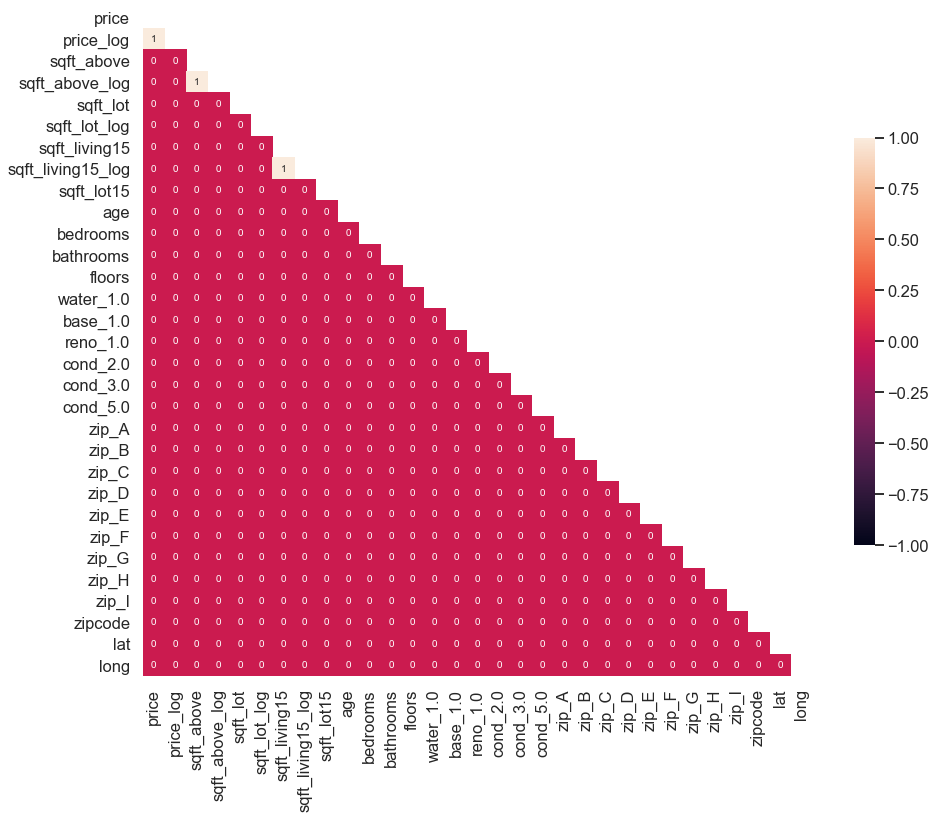

In [6738]:
#recheck for multicollinearity
mask = np.zeros_like(abs(clean.corr()) > 0.75)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15,15))
    ax = sns.heatmap(abs(clean.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

#save
plt.savefig('./Data & Figures/clean_multicollinearity_heatmap')

In [6736]:
#drop 'cond_4.0' because it is highly correlated with 'cond_3.0'
clean.drop('cond_4.0', axis = 1, inplace = True)

In [6737]:
#save
clean.to_csv('./Data & Figures/clean.csv')